In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer as MICE
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn import svm, datasets
from sklearn.feature_selection import VarianceThreshold
pd.set_option('display.max_rows', None)
import sys
np.set_printoptions(threshold=sys.maxsize)

In [5]:
suicide = pd.read_csv("Crude suicide rates.csv")
hr = pd.read_csv("Human Resources.csv")
hr = hr.drop('Year', axis = 1)
hr

Country  Psychiatrists   Nurses  Social_workers  \
0                         Afghanistan          0.231    0.098             NaN   
1                             Albania          1.471    6.876           1.060   
2                              Angola          0.057    0.660           0.022   
3                 Antigua and Barbuda          1.001    7.005           4.003   
4                           Argentina         21.705      NaN             NaN   
5                             Armenia          3.840   11.245           0.274   
6                          Azerbaijan          3.452    6.717           0.114   
7                          Bangladesh          0.130    0.873             NaN   
8                             Belarus         13.504      NaN             NaN   
9                              Belize          1.392    3.340             NaN   
10                             Bhutan          0.508    0.127             NaN   
11   Bolivia (Plurinational State of)          1.128      NaN             NaN   
12                             Brazil          3.165   34.948           6.608   
13                  Brunei Darussalam          1.197   15.088           0.239   
14                           Bulgaria          7.203   17.736           0.780   
15                       Burkina Faso          0.039    0.635           0.011   
16                           Cambodia          0.387    0.277             NaN   
17                               Chad          0.007    0.021           0.007   
18                              Chile          6.970    1.880             NaN   
19                           Colombia          1.835    0.000             NaN   
20                              Congo          0.080    0.500           0.020   
21                       Cook Islands          5.731   11.462          17.193   
22                         Costa Rica          3.931    5.699          76.957   
23                      Côte d'Ivoire          0.130    0.381             NaN   
24                            Croatia         11.095   41.856           1.298   
25                               Cuba          9.056    8.899           1.335   
26                 Dominican Republic          2.280      NaN           0.294   
27                            Ecuador          0.458    0.056           0.019   
28                              Egypt          1.600    4.799           0.448   
29                        El Salvador          0.887      NaN           0.301   
30                            Eritrea            NaN    2.166           0.041   
31                            Estonia         16.188   23.484           0.532   
32                               Fiji          0.224    1.457           0.560   
33                              Gabon          0.259    0.518           0.104   
34                             Gambia          0.101    0.303           0.101   
35                            Georgia          6.706    5.922             NaN   
36                              Ghana          0.058    7.733             NaN   
37                             Greece          5.803   12.748           3.459   
38                            Grenada          1.872    0.936           2.808   
39                          Guatemala          0.492    1.071           0.006   
40                             Guinea          0.025      NaN           0.008   
41                      Guinea-Bissau            NaN    0.791           0.169   
42                             Guyana          0.911      NaN             NaN   
43                              Haiti          0.075    0.233           0.373   
44                            Hungary         11.079   33.739             NaN   
45                              India          0.292    0.796           0.065   
46                          Indonesia          0.310    2.518             NaN   
47                             Israel          9.870      NaN             NaN   
48                              Japan         11.867   83.805

In [6]:
suicide

Country          Sex  \
0                                          Afghanistan   Both sexes   
1                                          Afghanistan         Male   
2                                          Afghanistan       Female   
3                                              Albania   Both sexes   
4                                              Albania         Male   
5                                              Albania       Female   
6                                              Algeria   Both sexes   
7                                              Algeria         Male   
8                                              Algeria       Female   
9                                               Angola   Both sexes   
10                                              Angola         Male   
11                                              Angola       Female   
12                                 Antigua and Barbuda   Both sexes   
13                                 Antigua and Barbuda         Male   
14                                 Antigua and Barbuda       Female   
15                                           Argentina   Both sexes   
16                                           Argentina         Male   
17                                           Argentina       Female   
18                                             Armenia   Both sexes   
19                                             Armenia         Male   
20                                             Armenia       Female   
21                                           Australia   Both sexes   
22                                           Australia         Male   
23                                           Australia       Female   
24                                             Austria   Both sexes   
25                                             Austria         Male   
26                                             Austria       Female   
27                                          Azerbaijan   Both sexes   
28                                          Azerbaijan         Male   
29                                          Azerbaijan       Female   
30                                             Bahamas   Both sexes   
31                                             Bahamas         Male   
32                                             Bahamas       Female   
33                                             Bahrain   Both sexes   
34                                             Bahrain         Male   
35                                             Bahrain       Female   
36                                          Bangladesh   Both sexes   
37                                          Bangladesh         Male   
38                                          Bangladesh       Female   
39                                            Barbados   Both sexes   
40                                            Barbados         Male   
41                                            Barbados       Female   
42                                             Belarus   Both sexes   
43                                             Belarus         Male   
44                                             Belarus       Female   
45                                             Belgium   Both sexes   
46                                             Belgium         Male   
47                                             Belgium       Female   
48                                              Belize   Both sexes   
49                                              Belize         Male   
50                                              Belize       Female   
51                                               Benin   Both sexes   
52                                               Benin         Male   
53                                               Benin       Female   
54                                              Bhutan   Both sexes   
55                                              Bhutan         Male   


In [7]:
corr = pd.concat([suicide, hr], axis=1, keys=['suicide', 'hr']).corr().loc['suicide', 'hr']
corr

Psychiatrists    Nurses  Social_workers  Psychologists
 80_above      -0.103822  0.040800       -0.053800      -0.077333
 70to79        -0.065401  0.103956       -0.038626      -0.105002
 60to69        -0.048811  0.112087        0.040885      -0.077691
 50to59        -0.046169  0.056048        0.125882       0.031454
 40to49        -0.024925  0.004177        0.246964       0.110156
 30to39        -0.025376  0.028686        0.312060       0.071681
 20to29        -0.022002  0.048341        0.399680       0.061256
 10to19        -0.066034  0.029492        0.333376       0.041000

In [8]:
#def corr(df1, df2):
    #n = len(df1)
    #v1, v2 = df1.values, df2.values
    #sums = np.multiply.outer(v2.sum(0), v1.sum(0))
    #stds = np.multiply.outer(v2.std(0), v1.std(0))
    #return pd.DataFrame((v2.T.dot(v1) - sums / n) / stds / n,
                        #df2.columns, df1.columns)

#corr(suicide, hr)

In [9]:
#max_corr = corr.abs().max(axis=1)
#max_corr

In [10]:
suicide.isna().sum().sum()

0

In [11]:
hr.isna().sum().sum()

81

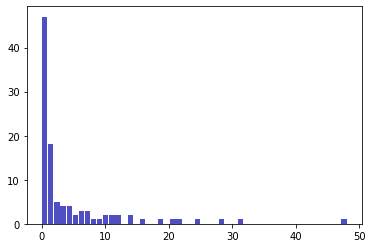

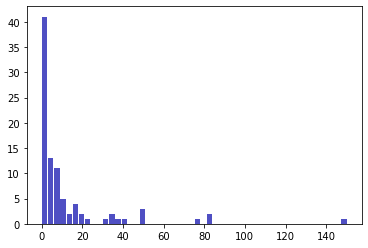

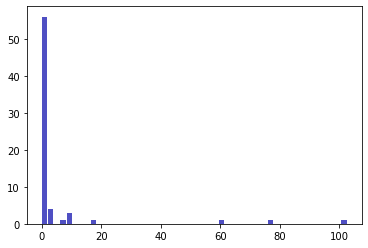

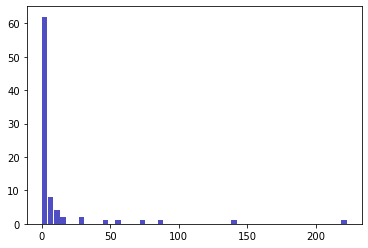

In [12]:
plt.hist(x=hr['Psychiatrists'].values, bins = 50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()
plt.hist(x=hr['Nurses'].values, bins = 50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()
plt.hist(x=hr['Social_workers'].values, bins = 50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()
plt.hist(x=hr['Psychologists'].values, bins = 50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [13]:
imr = IterativeImputer(min_value = 0)
imr = imr.fit(hr.drop('Country', axis = 1).values)
imputed_data = imr.transform(hr.drop('Country', axis = 1).values)

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\impute\_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"


In [14]:
prof = ['Psychologists', 'Social_workers', 'Nurses', 'Psychiatrists']
for i in range(4):
    hr[prof[i]] = [ele[-i-1] for ele in imputed_data]
hr

Country  Psychiatrists      Nurses  \
0                         Afghanistan       0.231000    0.098000   
1                             Albania       1.471000    6.876000   
2                              Angola       0.057000    0.660000   
3                 Antigua and Barbuda       1.001000    7.005000   
4                           Argentina      21.705000   41.758903   
5                             Armenia       3.840000   11.245000   
6                          Azerbaijan       3.452000    6.717000   
7                          Bangladesh       0.130000    0.873000   
8                             Belarus      13.504000   33.400737   
9                              Belize       1.392000    3.340000   
10                             Bhutan       0.508000    0.127000   
11   Bolivia (Plurinational State of)       1.128000    6.885797   
12                             Brazil       3.165000   34.948000   
13                  Brunei Darussalam       1.197000   15.088000   
14                           Bulgaria       7.203000   17.736000   
15                       Burkina Faso       0.039000    0.635000   
16                           Cambodia       0.387000    0.277000   
17                               Chad       0.007000    0.021000   
18                              Chile       6.970000    1.880000   
19                           Colombia       1.835000    0.000000   
20                              Congo       0.080000    0.500000   
21                       Cook Islands       5.731000   11.462000   
22                         Costa Rica       3.931000    5.699000   
23                      Côte d'Ivoire       0.130000    0.381000   
24                            Croatia      11.095000   41.856000   
25                               Cuba       9.056000    8.899000   
26                 Dominican Republic       2.280000    8.845759   
27                            Ecuador       0.458000    0.056000   
28                              Egypt       1.600000    4.799000   
29                        El Salvador       0.887000    6.451359   
30                            Eritrea       1.536206    2.166000   
31                            Estonia      16.188000   23.484000   
32                               Fiji       0.224000    1.457000   
33                              Gabon       0.259000    0.518000   
34                             Gambia       0.101000    0.303000   
35                            Georgia       6.706000    5.922000   
36                              Ghana       0.058000    7.733000   
37                             Greece       5.803000   12.748000   
38                            Grenada       1.872000    0.936000   
39                          Guatemala       0.492000    1.071000   
40                             Guinea       0.025000    4.835617   
41                      Guinea-Bissau       1.443761    0.791000   
42                             Guyana       0.911000    6.650441   
43                              Haiti       0.075000    0.233000   
44                            Hungary      11.079000   33.739000   
45                              India       0.292000    0.796000   
46                          Indonesia       0.310000    2.518000   
47                             Israel       9.870000   22.043588   
48                              Japan      11.867000   83.805000   
49                             Jordan       1.125000    3.297000   
50                              Kenya       0.184000    4.844336   
51                         Kyrgyzstan       1.688000    7.365000   
52                            Liberia       0.044000    6.401000   
53                          Lithuania      18.452000   49.763000   
54                         Madagascar       0.058000    0.314000   
55                           Malaysia       1.048000    6.838000   
56                               Mali       0.029000    0.092000   
57                             Mexico       0.207000    2.239000   
58                

In [15]:
corr = pd.concat([suicide, hr], axis=1, keys=['suicide', 'hr']).corr().loc['suicide', 'hr']
corr

Psychiatrists    Nurses  Social_workers  Psychologists
 80_above      -0.095497 -0.000239       -0.084142      -0.072269
 70to79        -0.058518  0.056634       -0.064468      -0.086655
 60to69        -0.039836  0.060323       -0.028101      -0.062469
 50to59        -0.037339  0.020751        0.037183       0.030610
 40to49        -0.016243 -0.011810        0.107562       0.102263
 30to39        -0.015792 -0.003780        0.095927       0.068014
 20to29        -0.011496  0.014577        0.111493       0.052762
 10to19        -0.054660 -0.018680        0.069961       0.030237

In [16]:
max_corr = corr.abs().max(axis=1)
max_corr

 80_above    0.095497
 70to79      0.086655
 60to69      0.062469
 50to59      0.037339
 40to49      0.107562
 30to39      0.095927
 20to29      0.111493
 10to19      0.069961
dtype: float64

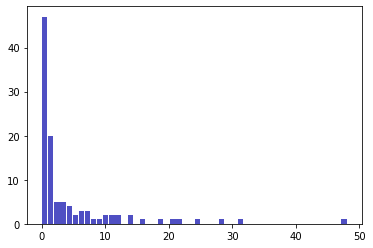

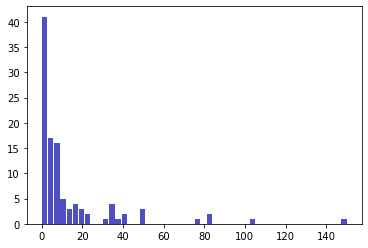

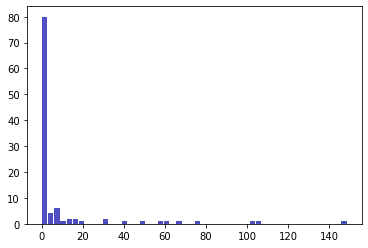

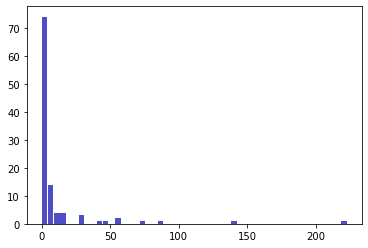

In [17]:
plt.hist(x=hr['Psychiatrists'].values, bins = 50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()
plt.hist(x=hr['Nurses'].values, bins = 50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()
plt.hist(x=hr['Social_workers'].values, bins = 50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()
plt.hist(x=hr['Psychologists'].values, bins = 50, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.show()

In [18]:
#suicide = suicide[suicide['Sex'] == ' Both sexes'].drop(['Sex'], axis=1)
suicide

Country          Sex  \
0                                          Afghanistan   Both sexes   
1                                          Afghanistan         Male   
2                                          Afghanistan       Female   
3                                              Albania   Both sexes   
4                                              Albania         Male   
5                                              Albania       Female   
6                                              Algeria   Both sexes   
7                                              Algeria         Male   
8                                              Algeria       Female   
9                                               Angola   Both sexes   
10                                              Angola         Male   
11                                              Angola       Female   
12                                 Antigua and Barbuda   Both sexes   
13                                 Antigua and Barbuda         Male   
14                                 Antigua and Barbuda       Female   
15                                           Argentina   Both sexes   
16                                           Argentina         Male   
17                                           Argentina       Female   
18                                             Armenia   Both sexes   
19                                             Armenia         Male   
20                                             Armenia       Female   
21                                           Australia   Both sexes   
22                                           Australia         Male   
23                                           Australia       Female   
24                                             Austria   Both sexes   
25                                             Austria         Male   
26                                             Austria       Female   
27                                          Azerbaijan   Both sexes   
28                                          Azerbaijan         Male   
29                                          Azerbaijan       Female   
30                                             Bahamas   Both sexes   
31                                             Bahamas         Male   
32                                             Bahamas       Female   
33                                             Bahrain   Both sexes   
34                                             Bahrain         Male   
35                                             Bahrain       Female   
36                                          Bangladesh   Both sexes   
37                                          Bangladesh         Male   
38                                          Bangladesh       Female   
39                                            Barbados   Both sexes   
40                                            Barbados         Male   
41                                            Barbados       Female   
42                                             Belarus   Both sexes   
43                                             Belarus         Male   
44                                             Belarus       Female   
45                                             Belgium   Both sexes   
46                                             Belgium         Male   
47                                             Belgium       Female   
48                                              Belize   Both sexes   
49                                              Belize         Male   
50                                              Belize       Female   
51                                               Benin   Both sexes   
52                                               Benin         Male   
53                                               Benin       Female   
54                                              Bhutan   Both sexes   
55                                              Bhutan         Male   


In [19]:
merge = pd.merge(suicide, hr, on="Country")
merge

Country          Sex   80_above   70to79  \
0                         Afghanistan   Both sexes       42.0     11.0   
1                         Afghanistan         Male       70.4     20.9   
2                         Afghanistan       Female       20.1      2.3   
3                             Albania   Both sexes       16.3      8.3   
4                             Albania         Male       23.2     11.9   
5                             Albania       Female       10.9      4.9   
6                              Angola   Both sexes       63.5     42.1   
7                              Angola         Male      123.2     68.2   
8                              Angola       Female       25.3     21.7   
9                 Antigua and Barbuda   Both sexes        0.0      0.0   
10                Antigua and Barbuda         Male        0.0      0.0   
11                Antigua and Barbuda       Female        0.0      0.0   
12                          Argentina   Both sexes       15.8     11.6   
13                          Argentina         Male       41.6     22.7   
14                          Argentina       Female        4.1      3.7   
15                            Armenia   Both sexes       27.9     17.4   
16                            Armenia         Male       41.0     28.1   
17                            Armenia       Female       20.2     10.4   
18                         Azerbaijan   Both sexes        7.7      6.6   
19                         Azerbaijan         Male       12.5     10.4   
20                         Azerbaijan       Female        5.0      4.0   
21                         Bangladesh   Both sexes       30.0     12.8   
22                         Bangladesh         Male       51.4     19.2   
23                         Bangladesh       Female       10.2      6.4   
24                            Belarus   Both sexes       40.6     32.4   
25                            Belarus         Male       96.1     76.8   
26                            Belarus       Female       22.9     11.4   
27                             Belize   Both sexes       22.4     18.0   
28                             Belize         Male       36.2     29.0   
29                             Belize       Female       10.4      7.0   
30                             Bhutan   Both sexes       18.9     13.7   
31                             Bhutan         Male       28.7     17.1   
32                             Bhutan       Female        7.7      9.6   
33   Bolivia (Plurinational State of)   Both sexes       14.1     13.4   
34   Bolivia (Plurinational State of)         Male       19.4     18.0   
35   Bolivia (Plurinational State of)       Female       10.2      9.2   
36                             Brazil   Both sexes       19.5     11.9   
37                             Brazil         Male       31.9     19.4   
38                             Brazil       Female       12.3      6.3   
39                  Brunei Darussalam   Both sexes       10.5      9.8   
40                  Brunei Darussalam         Male       13.6     11.4   
41                  Brunei Darussalam       Female        8.1      8.4   
42                           Bulgaria   Both sexes       35.3     23.2   
43                           Bulgaria         Male       64.5     41.3   
44                           Bulgaria       Female       18.9     11.0   
45                       Burkina Faso   Both sexes      108.0     68.0   
46                       Burkina Faso         Male      214.7    111.6   
47                       Burkina Faso       Female       47.4     40.5   
48                           Cambodia   Both sexes       15.5     13.1   
49                           Cambodia         Male       25.5     21.6   
50                           Cambodia       Female        9.3      7.4   
51                               Chad   Both sexes       76.8     55.9   
52                               Chad         Male       83.8     49.4   
53                               C

In [20]:
country = merge['Country']
sex = merge['Sex']
merge = merge.drop(['Country','Sex'],axis=1)

sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
sel.fit_transform(merge)
feature_sel_merge = merge[merge.columns[sel.get_support(indices=True)]]

feature_sel_merge.insert(loc=0, column='Sex', value = sex)
feature_sel_merge.insert(loc=0, column='Country', value = country)

feature_sel_merge

Country          Sex   80_above   70to79  \
0                         Afghanistan   Both sexes       42.0     11.0   
1                         Afghanistan         Male       70.4     20.9   
2                         Afghanistan       Female       20.1      2.3   
3                             Albania   Both sexes       16.3      8.3   
4                             Albania         Male       23.2     11.9   
5                             Albania       Female       10.9      4.9   
6                              Angola   Both sexes       63.5     42.1   
7                              Angola         Male      123.2     68.2   
8                              Angola       Female       25.3     21.7   
9                 Antigua and Barbuda   Both sexes        0.0      0.0   
10                Antigua and Barbuda         Male        0.0      0.0   
11                Antigua and Barbuda       Female        0.0      0.0   
12                          Argentina   Both sexes       15.8     11.6   
13                          Argentina         Male       41.6     22.7   
14                          Argentina       Female        4.1      3.7   
15                            Armenia   Both sexes       27.9     17.4   
16                            Armenia         Male       41.0     28.1   
17                            Armenia       Female       20.2     10.4   
18                         Azerbaijan   Both sexes        7.7      6.6   
19                         Azerbaijan         Male       12.5     10.4   
20                         Azerbaijan       Female        5.0      4.0   
21                         Bangladesh   Both sexes       30.0     12.8   
22                         Bangladesh         Male       51.4     19.2   
23                         Bangladesh       Female       10.2      6.4   
24                            Belarus   Both sexes       40.6     32.4   
25                            Belarus         Male       96.1     76.8   
26                            Belarus       Female       22.9     11.4   
27                             Belize   Both sexes       22.4     18.0   
28                             Belize         Male       36.2     29.0   
29                             Belize       Female       10.4      7.0   
30                             Bhutan   Both sexes       18.9     13.7   
31                             Bhutan         Male       28.7     17.1   
32                             Bhutan       Female        7.7      9.6   
33   Bolivia (Plurinational State of)   Both sexes       14.1     13.4   
34   Bolivia (Plurinational State of)         Male       19.4     18.0   
35   Bolivia (Plurinational State of)       Female       10.2      9.2   
36                             Brazil   Both sexes       19.5     11.9   
37                             Brazil         Male       31.9     19.4   
38                             Brazil       Female       12.3      6.3   
39                  Brunei Darussalam   Both sexes       10.5      9.8   
40                  Brunei Darussalam         Male       13.6     11.4   
41                  Brunei Darussalam       Female        8.1      8.4   
42                           Bulgaria   Both sexes       35.3     23.2   
43                           Bulgaria         Male       64.5     41.3   
44                           Bulgaria       Female       18.9     11.0   
45                       Burkina Faso   Both sexes      108.0     68.0   
46                       Burkina Faso         Male      214.7    111.6   
47                       Burkina Faso       Female       47.4     40.5   
48                           Cambodia   Both sexes       15.5     13.1   
49                           Cambodia         Male       25.5     21.6   
50                           Cambodia       Female        9.3      7.4   
51                               Chad   Both sexes       76.8     55.9   
52                               Chad         Male       83.8     49.4   
53                               C

In [21]:
feature_sel_merge.corr()

80_above    70to79   60to69    50to59     40to49    30to39  \
 80_above        1.000000  0.941117  0.827987  0.612695  0.401143  0.327255   
 70to79          0.941117  1.000000  0.925891  0.723530  0.504677  0.422736   
 60to69          0.827987  0.925891  1.000000  0.888028  0.720295  0.635479   
 50to59          0.612695  0.723530  0.888028  1.000000  0.935646  0.859798   
 40to49          0.401143  0.504677  0.720295  0.935646  1.000000  0.956327   
 30to39          0.327255  0.422736  0.635479  0.859798  0.956327  1.000000   
 20to29          0.241552  0.321733  0.519286  0.724948  0.836143  0.929058   
 10to19          0.115678  0.187010  0.335042  0.527571  0.643873  0.728000   
Psychiatrists   -0.102774 -0.091199  0.048289  0.224902  0.255411  0.218927   
Nurses          -0.123983 -0.113153 -0.018556  0.123504  0.184627  0.194338   
Social_workers  -0.112995 -0.124040 -0.044387  0.082497  0.123588  0.123025   
Psychologists   -0.132048 -0.144504 -0.100152 -0.020774  0.017032  0.025538   

                  20to29    10to19  Psychiatrists    Nurses  Social_workers  \
 80_above       0.241552  0.115678      -0.102774 -0.123983       -0.112995   
 70to79         0.321733  0.187010      -0.091199 -0.113153       -0.124040   
 60to69         0.519286  0.335042       0.048289 -0.018556       -0.044387   
 50to59         0.724948  0.527571       0.224902  0.123504        0.082497   
 40to49         0.836143  0.643873       0.255411  0.184627        0.123588   
 30to39         0.929058  0.728000       0.218927  0.194338        0.123025   
 20to29         1.000000  0.841213       0.182531  0.184268        0.151110   
 10to19         0.841213  1.000000       0.144333  0.127861        0.157486   
Psychiatrists   0.182531  0.144333       1.000000  0.659817        0.754050   
Nurses          0.184268  0.127861       0.659817  1.000000        0.448319   
Social_workers  0.151110  0.157486       0.754050  0.448319        1.000000   
Psychologists   0.073516  0.115752       0.508858  0.283516        0.900775   

                Psychologists  
 80_above           -0.132048  
 70to79             -0.144504  
 60to69             -0.100152  
 50to59             -0.020774  
 40to49              0.017032  
 30to39              0.025538  
 20to29              0.073516  
 10to19              0.115752  
Psychiatrists        0.508858  
Nurses               0.283516  
Social_workers       0.900775  
Psychologists        1.000000

<ipython-input-22-b51f7921105b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plot_merge = feature_sel_merge[suicide['Sex'] == ' Both sexes'].drop(['Sex'], axis=1)


<AxesSubplot:xlabel=' 40to49'>

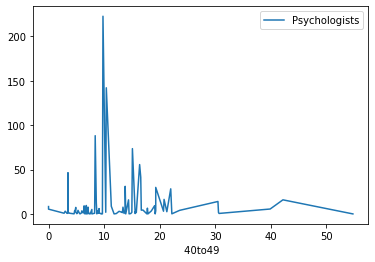

In [22]:
plot_merge = feature_sel_merge[suicide['Sex'] == ' Both sexes'].drop(['Sex'], axis=1)
plot_merge.sort_values(by = ' 40to49').reset_index(drop = True).plot(x=' 40to49', y = 'Psychologists')


# LAB2

# normalization

In [23]:
normalized = feature_sel_merge
normalized['all_age'] = normalized[[' 80_above', ' 70to79', ' 60to69 ', ' 50to59 ', ' 40to49', ' 30to39', ' 20to29']].sum(axis = 1, skipna = True)
normalized['all_spec'] = normalized[['Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists']].sum(axis = 1, skipna = True)

columns = ['Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists'] + [' 80_above', ' 70to79', ' 60to69 ', ' 50to59 ', ' 40to49', ' 30to39', ' 20to29', ' 10to19'] + ['all_age'] + ['all_spec'] 

for i in range(len(columns)):
    mean = np.mean(normalized[(columns)[i]])
    std = np.std(normalized[(columns)[i]], ddof=1)
    normalized[(columns)[i]] = (normalized[(columns)[i]]-mean)/std


normalized

Country          Sex   80_above    70to79  \
0                         Afghanistan   Both sexes  -0.019805 -0.601763   
1                         Afghanistan         Male   0.610997 -0.208432   
2                         Afghanistan       Female  -0.506234 -0.947418   
3                             Albania   Both sexes  -0.590637 -0.709036   
4                             Albania         Male  -0.437378 -0.566006   
5                             Albania       Female  -0.710578 -0.844119   
6                              Angola   Both sexes   0.457739  0.633853   
7                              Angola         Male   1.783756  1.670818   
8                              Angola       Female  -0.390735 -0.176648   
9                 Antigua and Barbuda   Both sexes  -0.952682 -1.038798   
10                Antigua and Barbuda         Male  -0.952682 -1.038798   
11                Antigua and Barbuda       Female  -0.952682 -1.038798   
12                          Argentina   Both sexes  -0.601742 -0.577925   
13                          Argentina         Male  -0.028690 -0.136917   
14                          Argentina       Female  -0.861615 -0.891796   
15                            Armenia   Both sexes  -0.332985 -0.347489   
16                            Armenia         Male  -0.042016  0.077627   
17                            Armenia       Female  -0.504012 -0.625602   
18                         Azerbaijan   Both sexes  -0.781654 -0.776577   
19                         Azerbaijan         Male  -0.675040 -0.625602   
20                         Azerbaijan       Female  -0.841625 -0.879876   
21                         Bangladesh   Both sexes  -0.286341 -0.530249   
22                         Bangladesh         Male   0.188982 -0.275974   
23                         Bangladesh       Female  -0.726126 -0.784523   
24                            Belarus   Both sexes  -0.050901  0.248468   
25                            Belarus         Male   1.181829  2.012500   
26                            Belarus       Female  -0.444042 -0.585871   
27                             Belize   Both sexes  -0.455147 -0.323650   
28                             Belize         Male  -0.148631  0.113385   
29                             Belize       Female  -0.721684 -0.760685   
30                             Bhutan   Both sexes  -0.532887 -0.494491   
31                             Bhutan         Male  -0.315216 -0.359408   
32                             Bhutan       Female  -0.781654 -0.657386   
33   Bolivia (Plurinational State of)   Both sexes  -0.639502 -0.506410   
34   Bolivia (Plurinational State of)         Male  -0.521782 -0.323650   
35   Bolivia (Plurinational State of)       Female  -0.726126 -0.673278   
36                             Brazil   Both sexes  -0.519560 -0.566006   
37                             Brazil         Male  -0.244140 -0.268028   
38                             Brazil       Female  -0.679482 -0.788496   
39                  Brunei Darussalam   Both sexes  -0.719462 -0.649440   
40                  Brunei Darussalam         Male  -0.650607 -0.585871   
41                  Brunei Darussalam       Female  -0.772770 -0.705063   
42                           Bulgaria   Both sexes  -0.168621 -0.117052   
43                           Bulgaria         Male   0.479950  0.602069   
44                           Bulgaria       Female  -0.532887 -0.601763   
45                       Burkina Faso   Both sexes   1.446144  1.662872   
46                       Burkina Faso         Male   3.816094  3.395119   
47                       Burkina Faso       Female   0.100136  0.570285   
48                           Cambodia   Both sexes  -0.608406 -0.518329   
49                           Cambodia         Male  -0.386292 -0.180621   
50                           Cambodia       Female  -0.746116 -0.744793   
51                               Chad   Both sexes   0.753150  1.182133   
52                               Chad         Male   0.

# lin reg

In [24]:
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics # model precision

In [25]:
normalized


Country          Sex   80_above    70to79  \
0                         Afghanistan   Both sexes  -0.019805 -0.601763   
1                         Afghanistan         Male   0.610997 -0.208432   
2                         Afghanistan       Female  -0.506234 -0.947418   
3                             Albania   Both sexes  -0.590637 -0.709036   
4                             Albania         Male  -0.437378 -0.566006   
5                             Albania       Female  -0.710578 -0.844119   
6                              Angola   Both sexes   0.457739  0.633853   
7                              Angola         Male   1.783756  1.670818   
8                              Angola       Female  -0.390735 -0.176648   
9                 Antigua and Barbuda   Both sexes  -0.952682 -1.038798   
10                Antigua and Barbuda         Male  -0.952682 -1.038798   
11                Antigua and Barbuda       Female  -0.952682 -1.038798   
12                          Argentina   Both sexes  -0.601742 -0.577925   
13                          Argentina         Male  -0.028690 -0.136917   
14                          Argentina       Female  -0.861615 -0.891796   
15                            Armenia   Both sexes  -0.332985 -0.347489   
16                            Armenia         Male  -0.042016  0.077627   
17                            Armenia       Female  -0.504012 -0.625602   
18                         Azerbaijan   Both sexes  -0.781654 -0.776577   
19                         Azerbaijan         Male  -0.675040 -0.625602   
20                         Azerbaijan       Female  -0.841625 -0.879876   
21                         Bangladesh   Both sexes  -0.286341 -0.530249   
22                         Bangladesh         Male   0.188982 -0.275974   
23                         Bangladesh       Female  -0.726126 -0.784523   
24                            Belarus   Both sexes  -0.050901  0.248468   
25                            Belarus         Male   1.181829  2.012500   
26                            Belarus       Female  -0.444042 -0.585871   
27                             Belize   Both sexes  -0.455147 -0.323650   
28                             Belize         Male  -0.148631  0.113385   
29                             Belize       Female  -0.721684 -0.760685   
30                             Bhutan   Both sexes  -0.532887 -0.494491   
31                             Bhutan         Male  -0.315216 -0.359408   
32                             Bhutan       Female  -0.781654 -0.657386   
33   Bolivia (Plurinational State of)   Both sexes  -0.639502 -0.506410   
34   Bolivia (Plurinational State of)         Male  -0.521782 -0.323650   
35   Bolivia (Plurinational State of)       Female  -0.726126 -0.673278   
36                             Brazil   Both sexes  -0.519560 -0.566006   
37                             Brazil         Male  -0.244140 -0.268028   
38                             Brazil       Female  -0.679482 -0.788496   
39                  Brunei Darussalam   Both sexes  -0.719462 -0.649440   
40                  Brunei Darussalam         Male  -0.650607 -0.585871   
41                  Brunei Darussalam       Female  -0.772770 -0.705063   
42                           Bulgaria   Both sexes  -0.168621 -0.117052   
43                           Bulgaria         Male   0.479950  0.602069   
44                           Bulgaria       Female  -0.532887 -0.601763   
45                       Burkina Faso   Both sexes   1.446144  1.662872   
46                       Burkina Faso         Male   3.816094  3.395119   
47                       Burkina Faso       Female   0.100136  0.570285   
48                           Cambodia   Both sexes  -0.608406 -0.518329   
49                           Cambodia         Male  -0.386292 -0.180621   
50                           Cambodia       Female  -0.746116 -0.744793   
51                               Chad   Both sexes   0.753150  1.182133   
52                               Chad         Male   0.

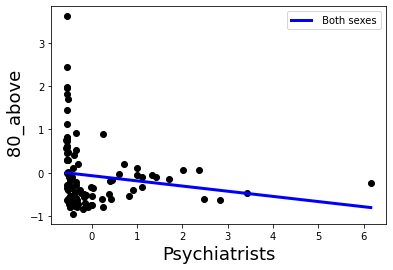

MAE: 0.5730948813438904
r2: 0.023310464719257684


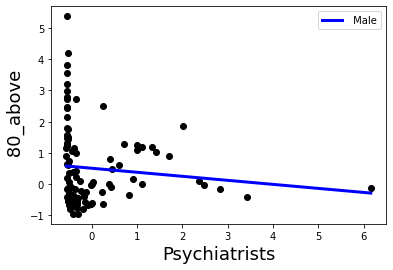

MAE: 1.0014952756239857
r2: 0.010424870767472116


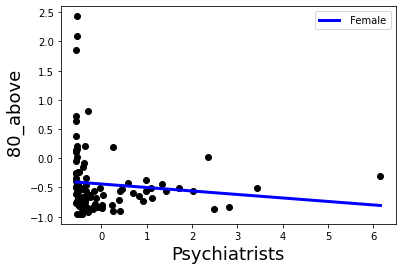

MAE: 0.36673360205468203
r2: 0.010805454946932191


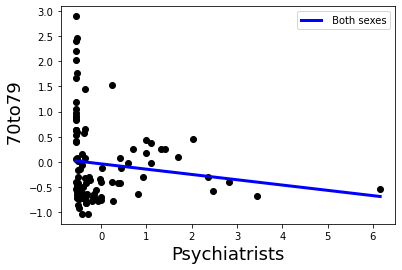

MAE: 0.6463225948135931
r2: 0.015918124501716147


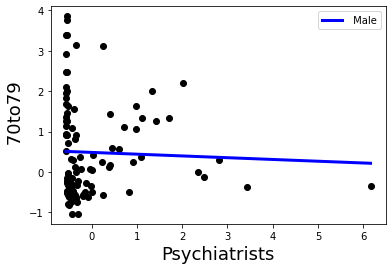

MAE: 0.95493547969153
r2: 0.0014011801272904023


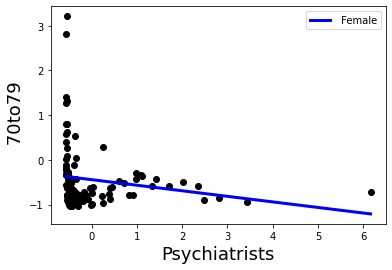

MAE: 0.4598448321308955
r2: 0.03064245279669242


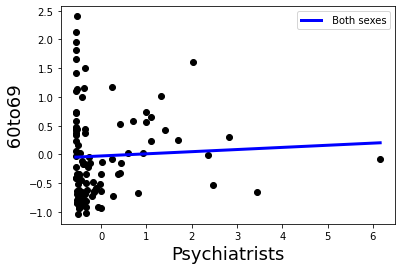

MAE: 0.6207718683887737
r2: 0.0022850783315899736


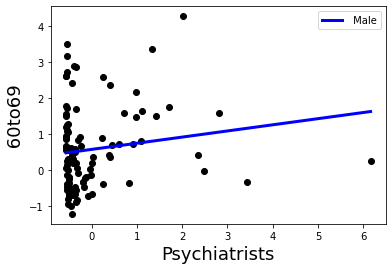

MAE: 0.9175447865973572
r2: 0.021758383576164775


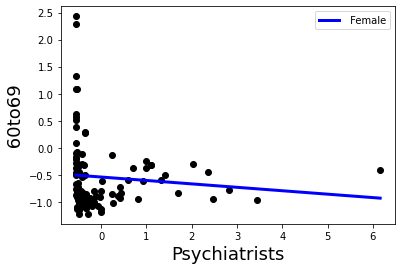

MAE: 0.45316129559681106
r2: 0.009443839899649364


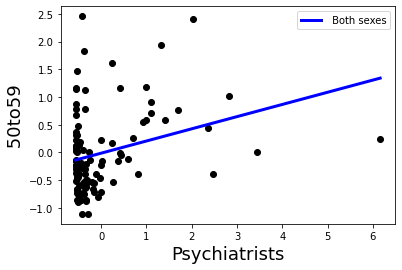

MAE: 0.5575827368648351
r2: 0.0857585314910515


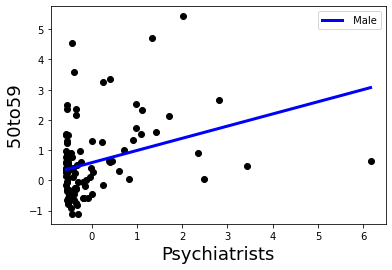

MAE: 0.8759657654623134
r2: 0.1027057700115307


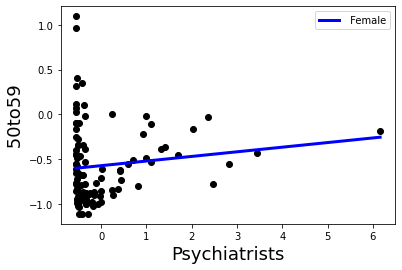

MAE: 0.3240848279214866
r2: 0.014625037530402674


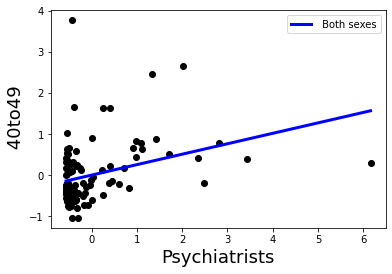

MAE: 0.5054448292332384
r2: 0.11030502702718548


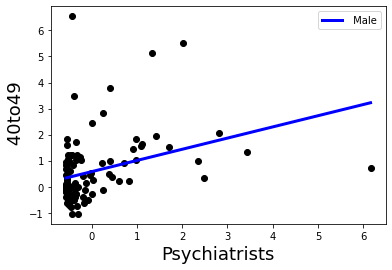

MAE: 0.8160643289667088
r2: 0.11318284254295063


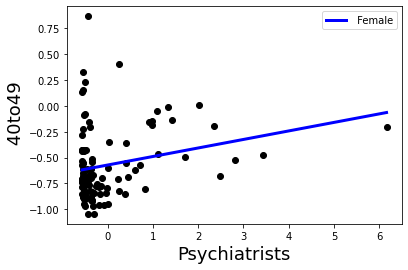

MAE: 0.255487587879941
r2: 0.056173784669128035


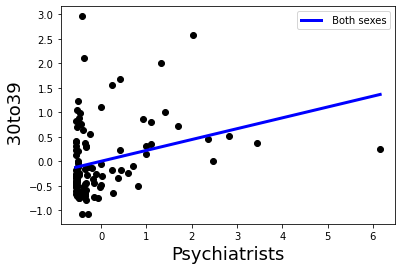

MAE: 0.5429897188522611
r2: 0.0853047806945294


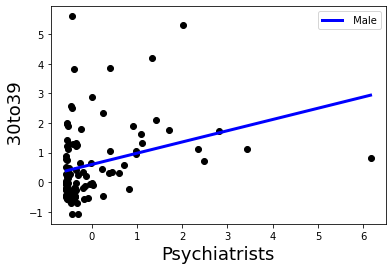

MAE: 0.8665916033528512
r2: 0.09204009909125388


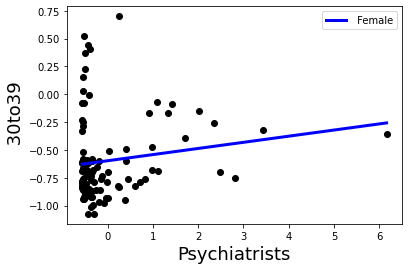

MAE: 0.2766778608948682
r2: 0.02148426187776553


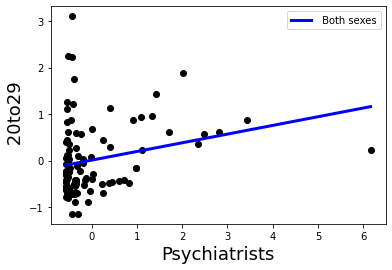

MAE: 0.5454534039388003
r2: 0.059891148344550116


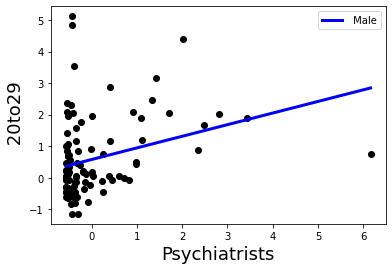

MAE: 0.8465926410519741
r2: 0.09168530854351153


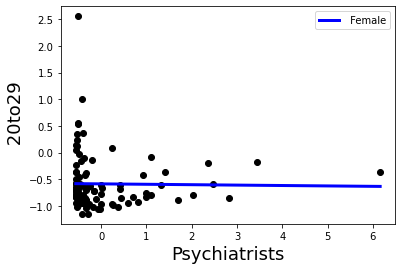

MAE: 0.3422107474391495
r2: 0.00022985111629214572


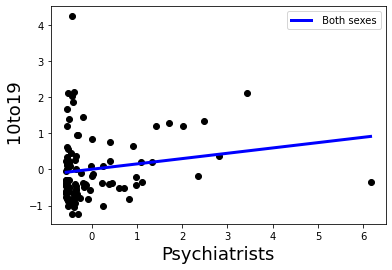

MAE: 0.6468653684427331
r2: 0.027442168092066455


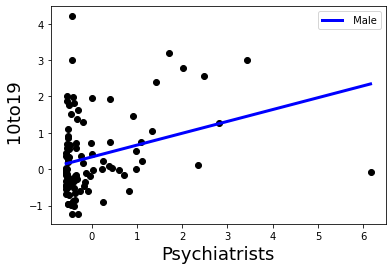

MAE: 0.7739154915450519
r2: 0.09451026769050264


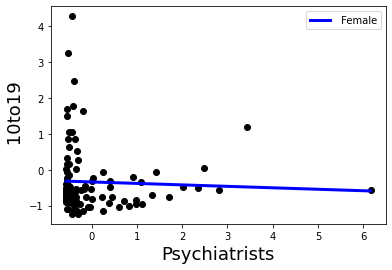

MAE: 0.621356035158904
r2: 0.0019461816187162917


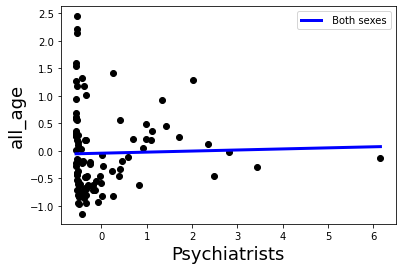

MAE: 0.5816642525108455
r2: 0.0006748683673817313


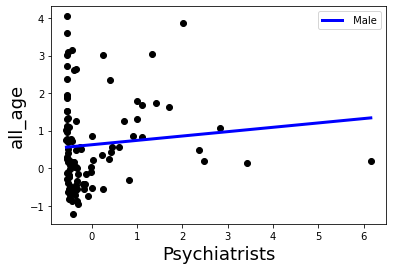

MAE: 0.9422447228247359
r2: 0.009579139694218974


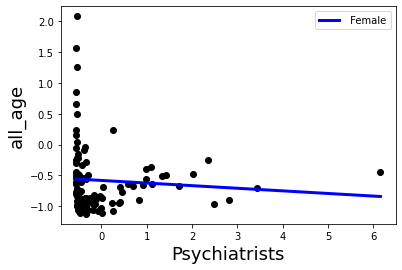

MAE: 0.37201503921332446
r2: 0.00593157520559795


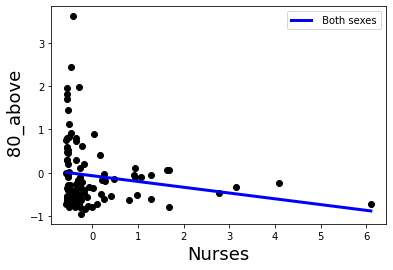

MAE: 0.5685661345458957
r2: 0.029095785221632364


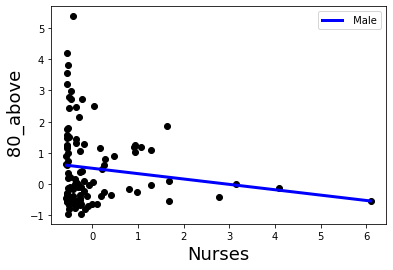

MAE: 0.9904093491244883
r2: 0.01856487634376236


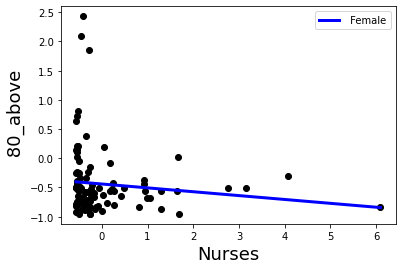

MAE: 0.36512197485959774
r2: 0.013270039115485632


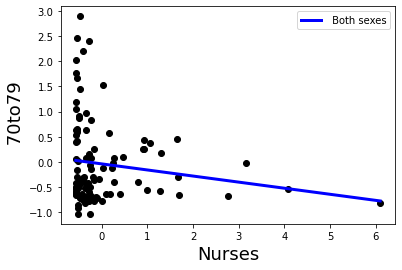

MAE: 0.6436800574531921
r2: 0.021017804361571635


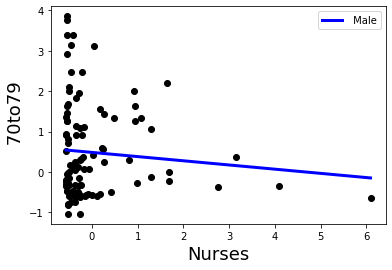

MAE: 0.9523963507867342
r2: 0.007903855023471684


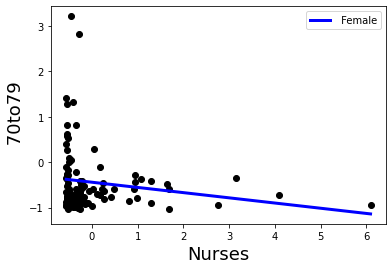

MAE: 0.45929516430028217
r2: 0.025944706601421563


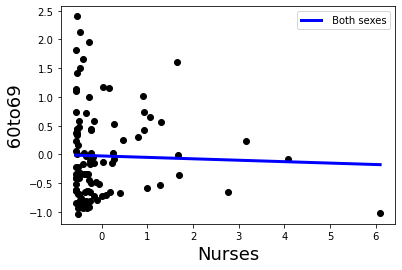

MAE: 0.6237927195614604
r2: 0.0010220628146441202


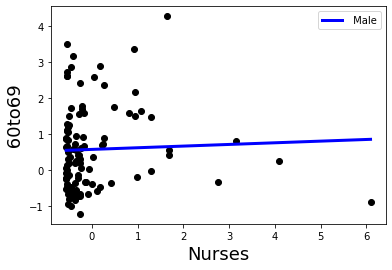

MAE: 0.9247099976473009
r2: 0.0015716402378699312


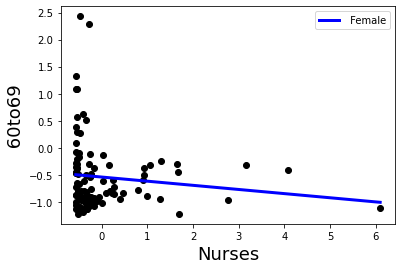

MAE: 0.45229270065232074
r2: 0.013826870529796365


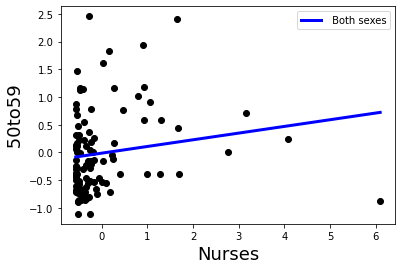

MAE: 0.5768576200327433
r2: 0.025873013212962093


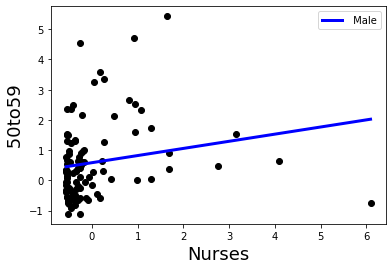

MAE: 0.9095631366732753
r2: 0.035163802049560045


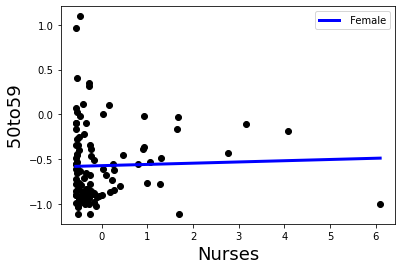

MAE: 0.3318274801818858
r2: 0.0010434320674068687


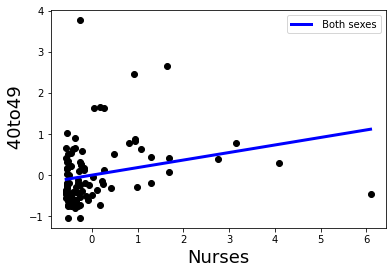

MAE: 0.5274668952312511
r2: 0.05730816419024498


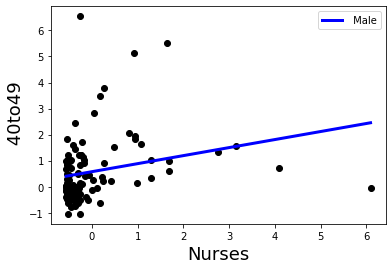

MAE: 0.8534969514246664
r2: 0.05820857229311238


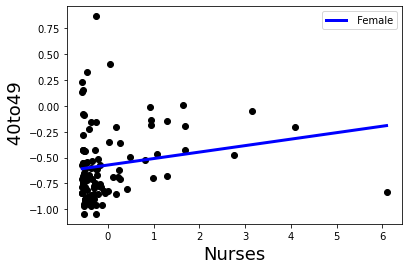

MAE: 0.2573304394093135
r2: 0.03236218142502956


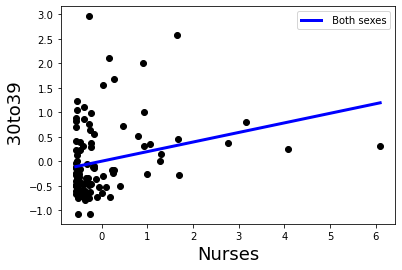

MAE: 0.5524691486228687
r2: 0.06668643006819852


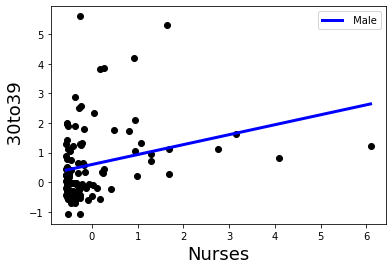

MAE: 0.8834637231988138
r2: 0.07178091626322758


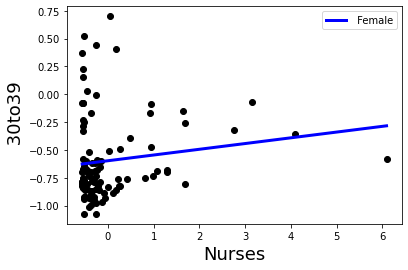

MAE: 0.27927641447534435
r2: 0.018714805434229653


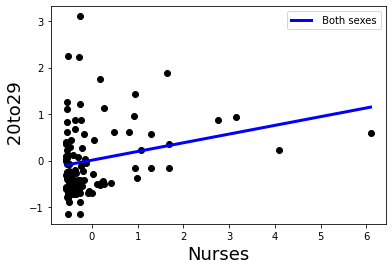

MAE: 0.5563234291818611
r2: 0.06001812545072349


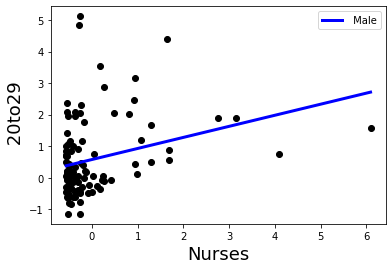

MAE: 0.8674798008164607
r2: 0.0830811309179722


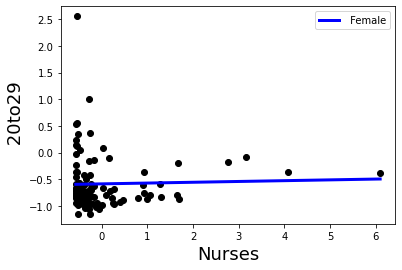

MAE: 0.3387530351323382
r2: 0.0008667067421944674


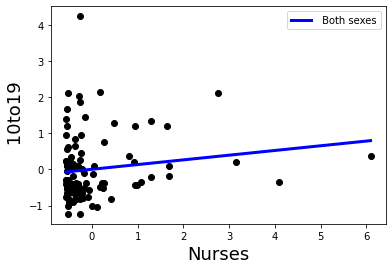

MAE: 0.6559513748986192
r2: 0.021302432996325504


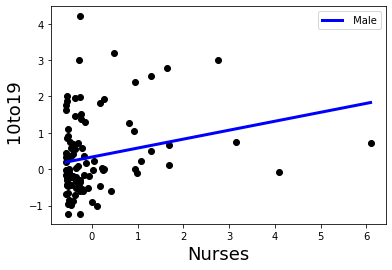

MAE: 0.8013610952222374
r2: 0.05364922973475472


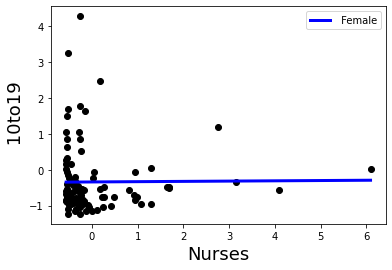

MAE: 0.6211735547419964
r2: 7.241335506202873e-05


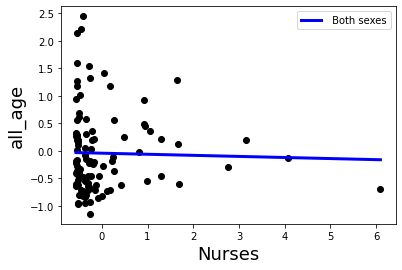

MAE: 0.5826631615701582
r2: 0.0006862659682997929


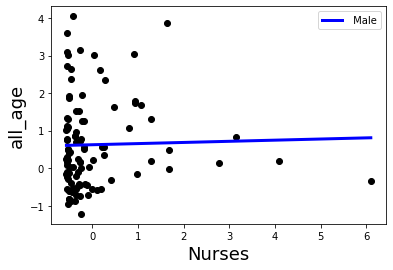

MAE: 0.9458372786238247
r2: 0.0006597895405676679


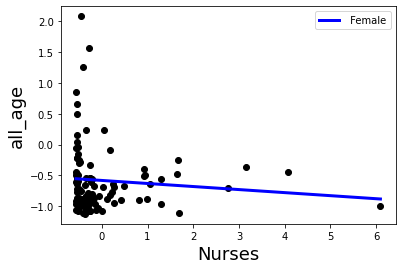

MAE: 0.37170016075147017
r2: 0.008108025024855525


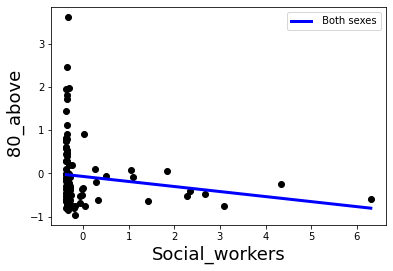

MAE: 0.563455220041945
r2: 0.02206327589243695


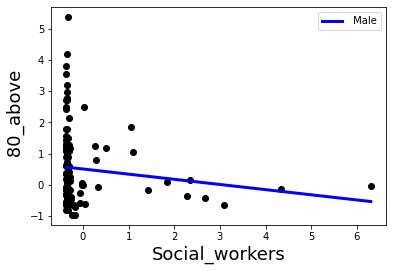

MAE: 0.9915585868140793
r2: 0.0171221515875426


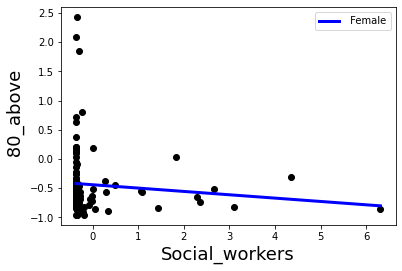

MAE: 0.3633437733260998
r2: 0.009948617225470913


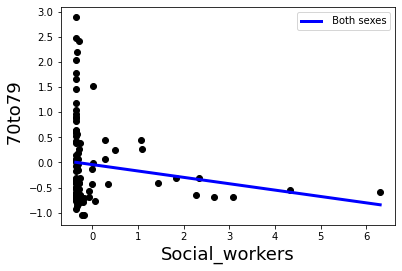

MAE: 0.6345143580374936
r2: 0.023040252932764016


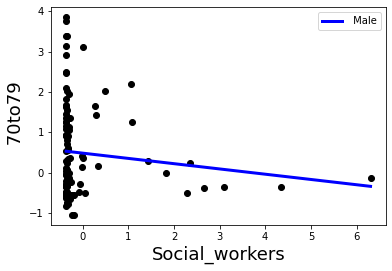

MAE: 0.9410378075352657
r2: 0.012483093761091357


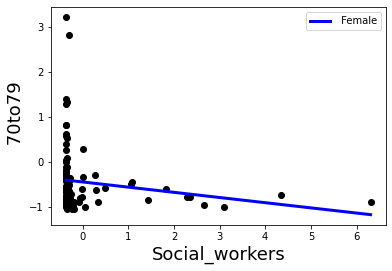

MAE: 0.45272433685765606
r2: 0.02609175128023633


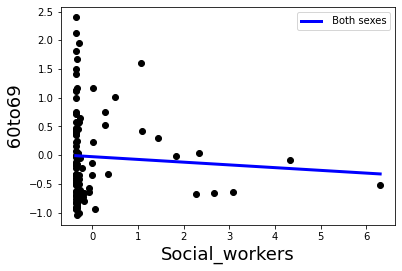

MAE: 0.6233446149303817
r2: 0.003745595811335045


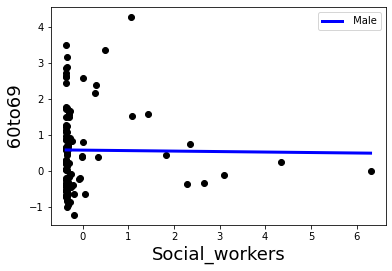

MAE: 0.9228311158838517
r2: 0.00013245088870905697


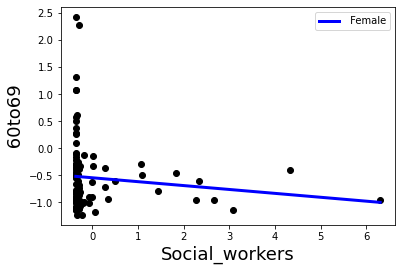

MAE: 0.44976779479272966
r2: 0.012221165988198668


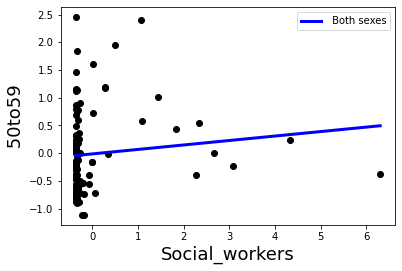

MAE: 0.5824936859622174
r2: 0.011519743223124768


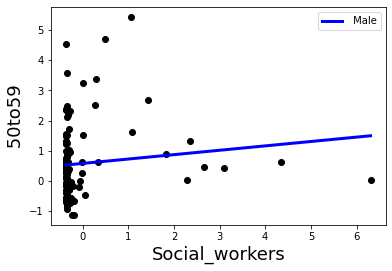

MAE: 0.9239393237156448
r2: 0.013284106047761424


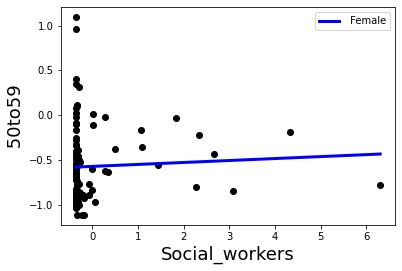

MAE: 0.33227088365105406
r2: 0.0026318420352300365


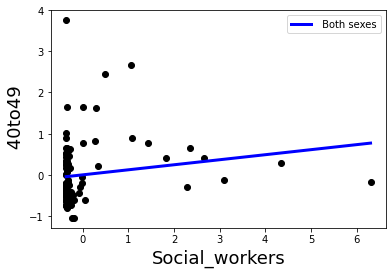

MAE: 0.544673404312081
r2: 0.025596580596212948


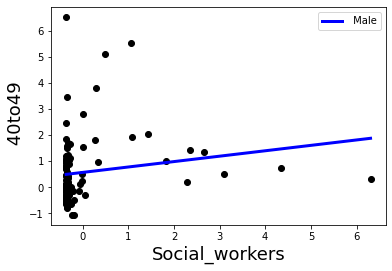

MAE: 0.8807342033610972
r2: 0.026436967424524282


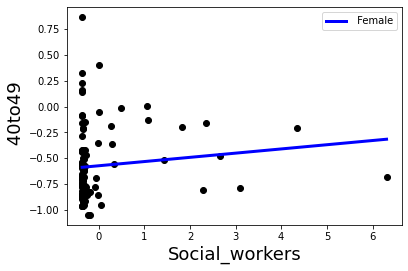

MAE: 0.263813219260225
r2: 0.013682757473517326


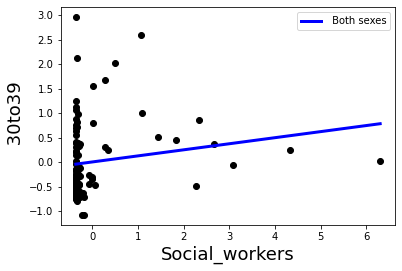

MAE: 0.5700303690238984
r2: 0.026679113098365792


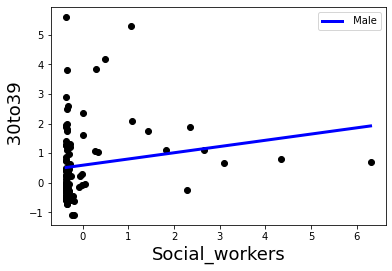

MAE: 0.9141743234908455
r2: 0.028210860779324


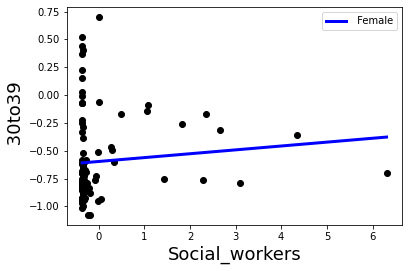

MAE: 0.2824967556689455
r2: 0.008530063254645448


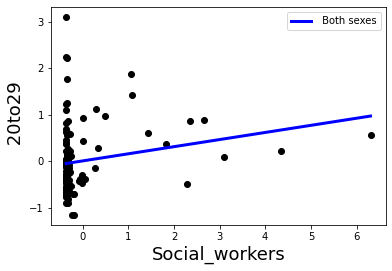

MAE: 0.562196724590704
r2: 0.04010885243258744


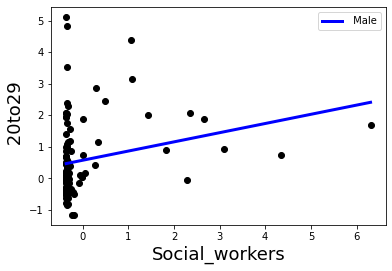

MAE: 0.8746352444397256
r2: 0.05735252640530675


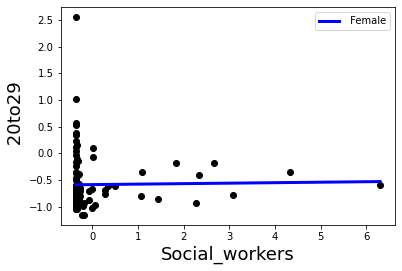

MAE: 0.34049270838881146
r2: 0.00031175686380591205


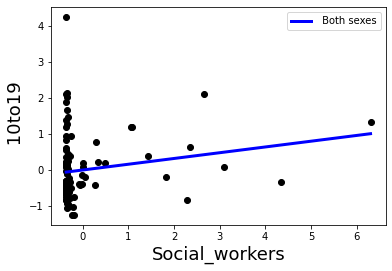

MAE: 0.6417448345205007
r2: 0.03199432718941775


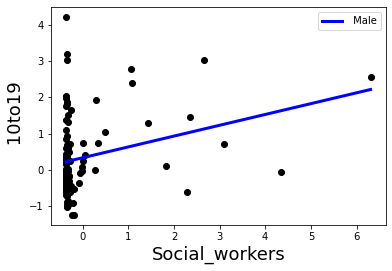

MAE: 0.7717904662637012
r2: 0.07860405902719514


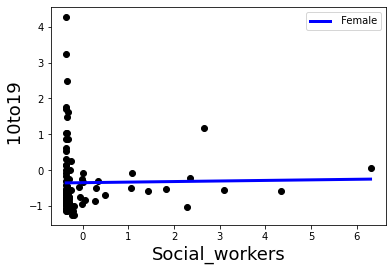

MAE: 0.620045413301172
r2: 0.00028942240138696285


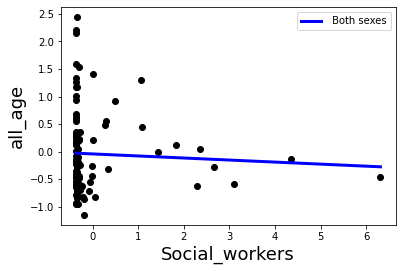

MAE: 0.5822086157394858
r2: 0.0024745328070989725


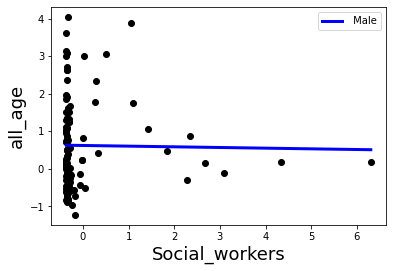

MAE: 0.9435829560402827
r2: 0.00022758599833450077


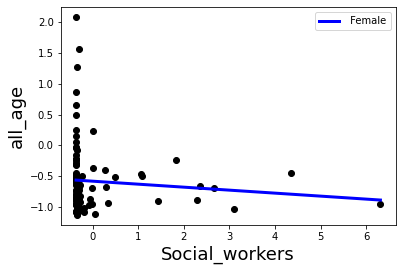

MAE: 0.3696154757259859
r2: 0.007828864431573157


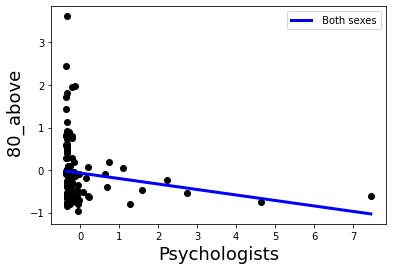

MAE: 0.5588793954761087
r2: 0.0270688103209461


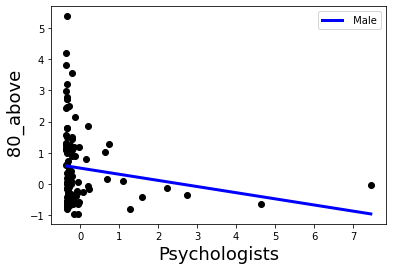

MAE: 0.9914969453439139
r2: 0.02431921715963581


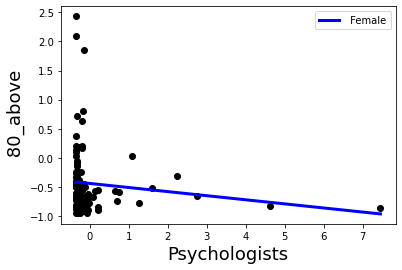

MAE: 0.3601198286018157
r2: 0.014942531596913833


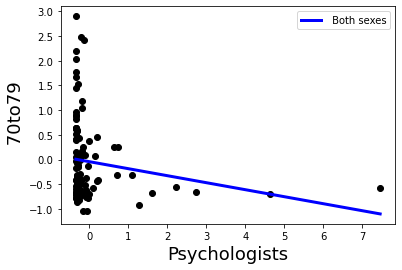

MAE: 0.6348525996060019
r2: 0.02868518483204119


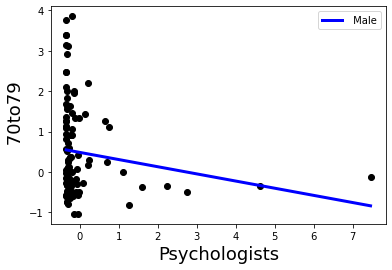

MAE: 0.9412491663658756
r2: 0.02310946626283983


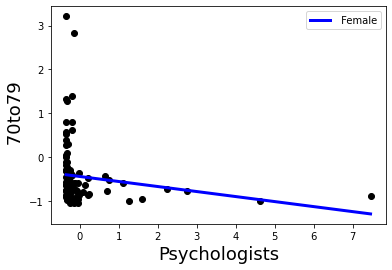

MAE: 0.44807117768492744
r2: 0.025944995321978692


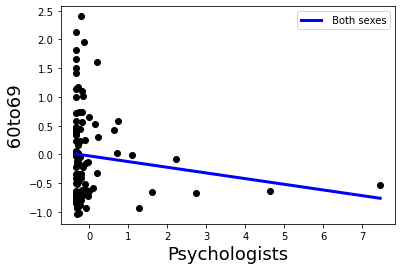

MAE: 0.6182116975060512
r2: 0.01610894585049194


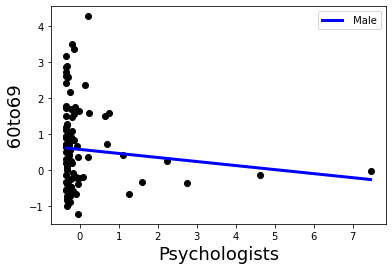

MAE: 0.9115980550669622
r2: 0.009400994543897534


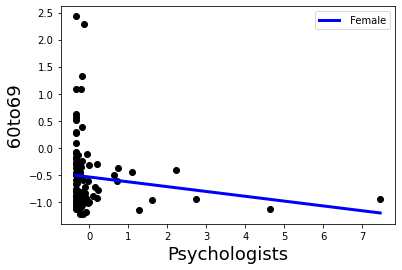

MAE: 0.44672187125475
r2: 0.01866695023985565


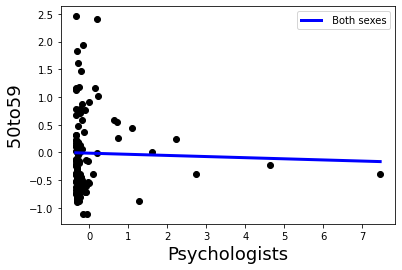

MAE: 0.5836336778877593
r2: 0.0007349251145155611


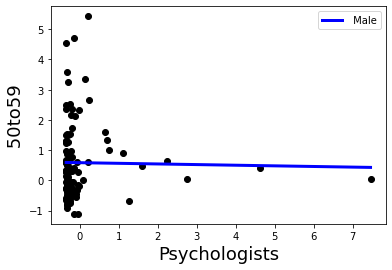

MAE: 0.9219788550708388
r2: 0.00027761802601700136


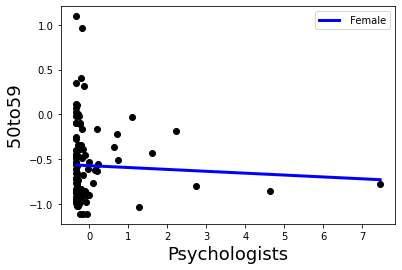

MAE: 0.3324653174389366
r2: 0.0024280691164938473


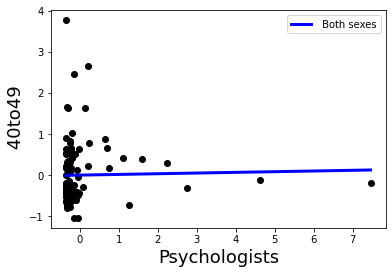

MAE: 0.5549682849046527
r2: 0.0004740556355143921


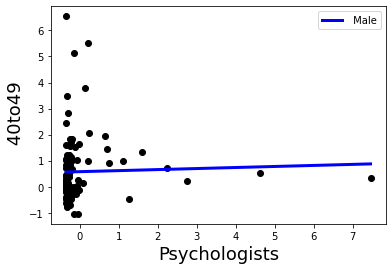

MAE: 0.8943682529868754
r2: 0.0009804236784513032


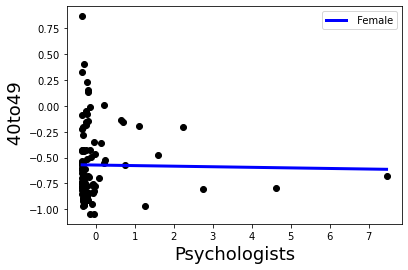

MAE: 0.26854143224307814
r2: 0.0002543091133522246


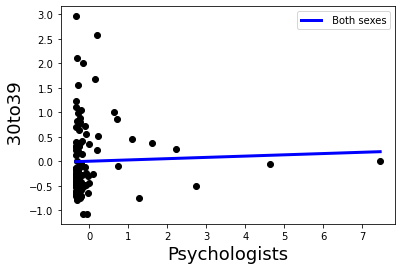

MAE: 0.5827279939645273
r2: 0.001186123096711178


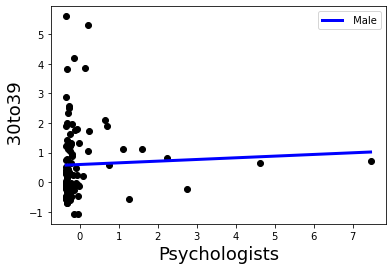

MAE: 0.9319005123976929
r2: 0.002037262238117288


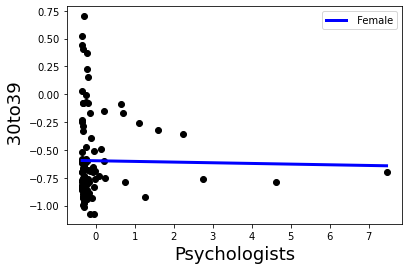

MAE: 0.28711209693454376
r2: 0.0002596786159722031


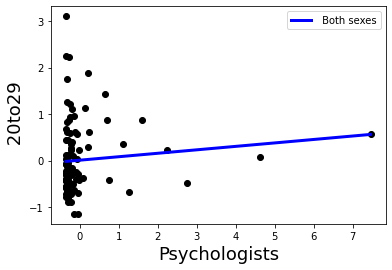

MAE: 0.5742298043608588
r2: 0.009447559397098182


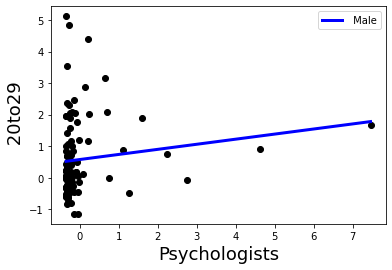

MAE: 0.895531976487733
r2: 0.017584210914175946


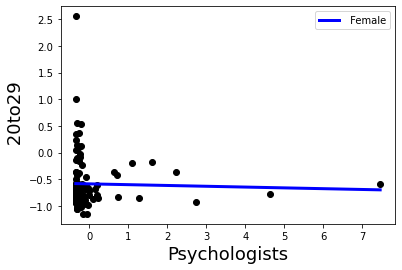

MAE: 0.34300587690972717
r2: 0.0008693978739490182


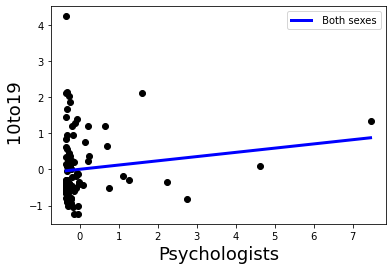

MAE: 0.654368584213578
r2: 0.01724024091615395


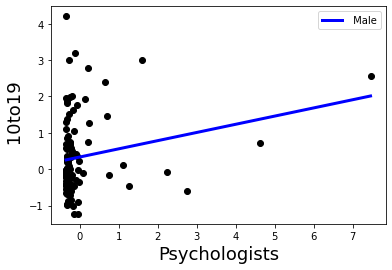

MAE: 0.7941061349301944
r2: 0.044975692463320116


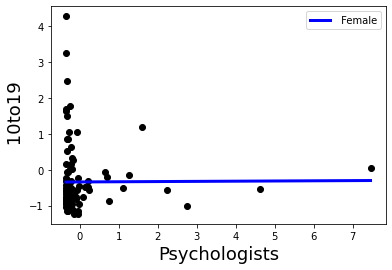

MAE: 0.6209239186760203
r2: 3.3147335449346116e-05


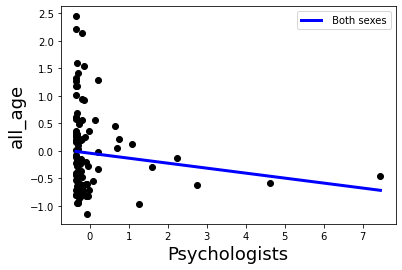

MAE: 0.5783686388794508
r2: 0.014729696167093964


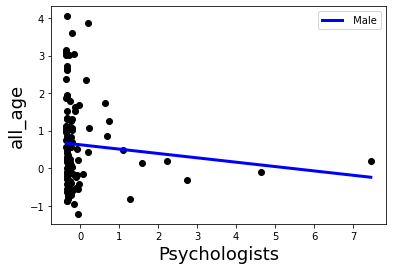

MAE: 0.936503163933316
r2: 0.009581095673718676


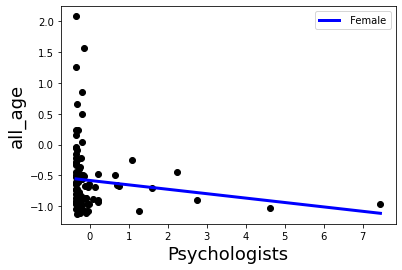

MAE: 0.3648581629378533
r2: 0.01700148788130673


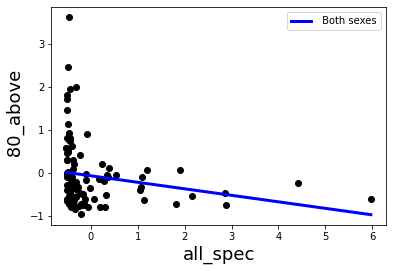

MAE: 0.5634744973751917
r2: 0.03729639443834876


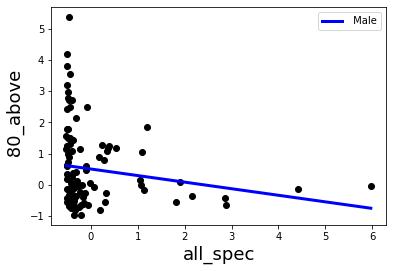

MAE: 0.9905966474951349
r2: 0.02776862064329444


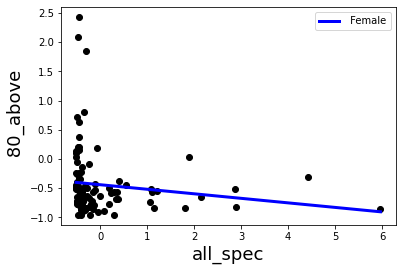

MAE: 0.3622517369299807
r2: 0.018240913199811026


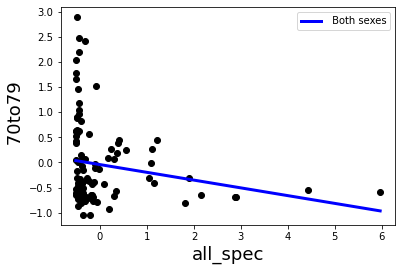

MAE: 0.637937923425776
r2: 0.03415689601539196


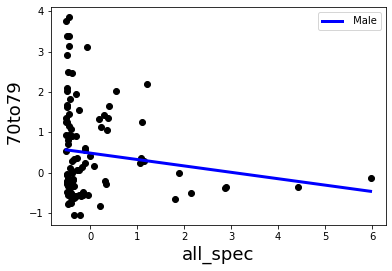

MAE: 0.9397483027702915
r2: 0.018432513095344327


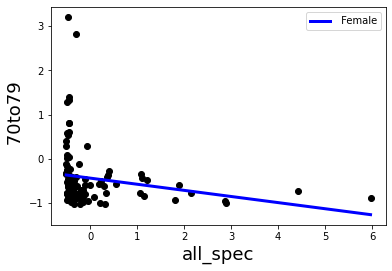

MAE: 0.453789781774447
r2: 0.03808760546792633


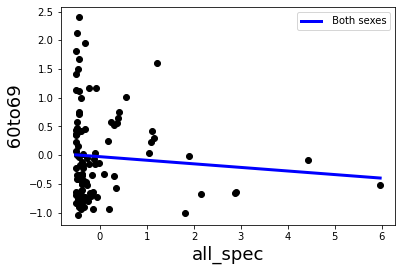

MAE: 0.6236259589388057
r2: 0.00640380536936469


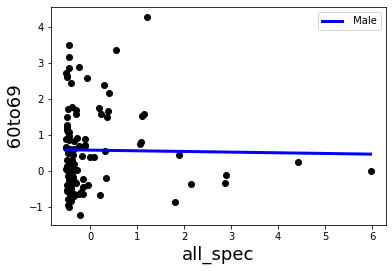

MAE: 0.9223657201747255
r2: 0.00025604047889538073


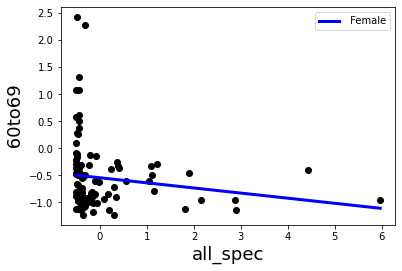

MAE: 0.449347052958741
r2: 0.020983722443492114


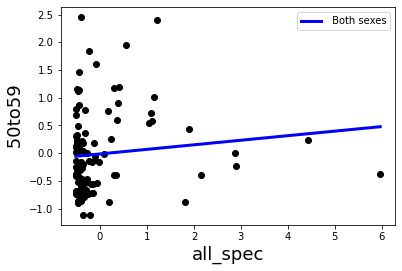

MAE: 0.5826632622146212
r2: 0.012001673738309404


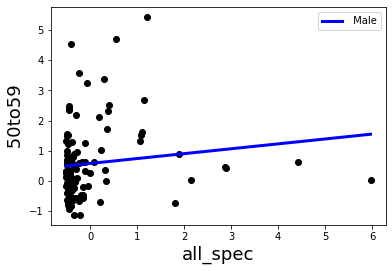

MAE: 0.9233414164043238
r2: 0.016528082101048502


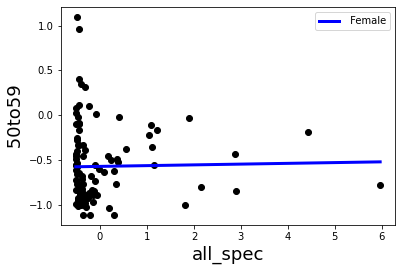

MAE: 0.33294411814285346
r2: 0.0003946485580702541


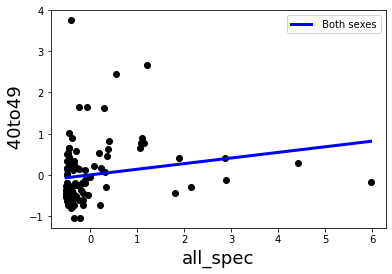

MAE: 0.5405991041140501
r2: 0.03186192522121756


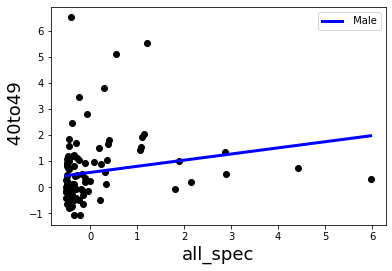

MAE: 0.873815971637883
r2: 0.03404553062230342


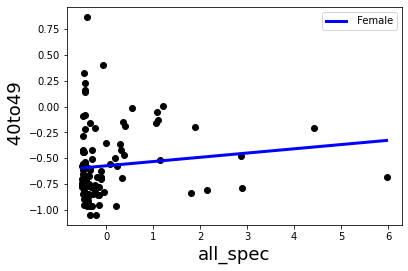

MAE: 0.2635467386992362
r2: 0.013915913603151697


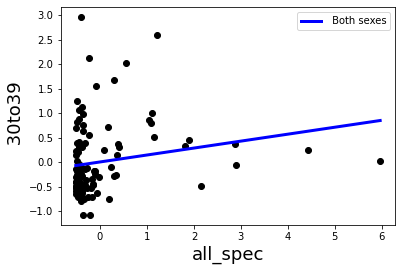

MAE: 0.5641108859827109
r2: 0.03499774176651549


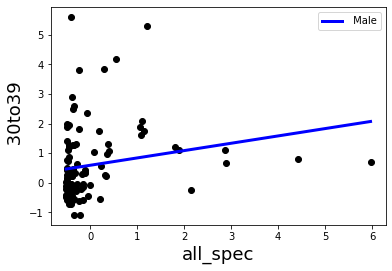

MAE: 0.9027262952372314
r2: 0.039058623093969014


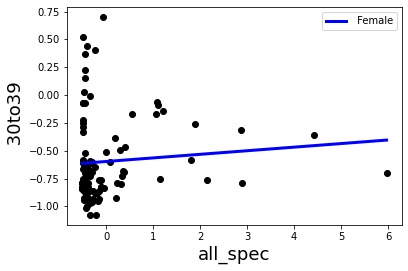

MAE: 0.2829363377857939
r2: 0.007319268616160057


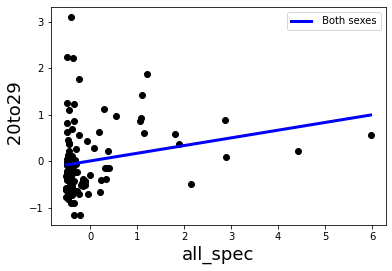

MAE: 0.5580431286217199
r2: 0.046893977276181276


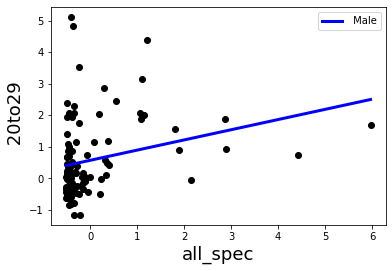

MAE: 0.8643311130165439
r2: 0.07044410791558164


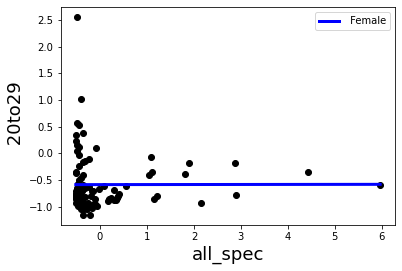

MAE: 0.3411683234550782
r2: 2.6255147024256686e-06


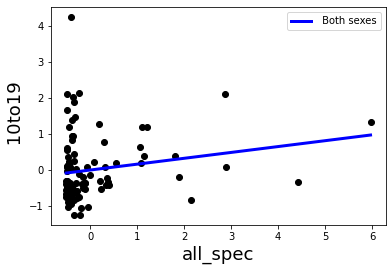

MAE: 0.6406448605231905
r2: 0.03318339913394974


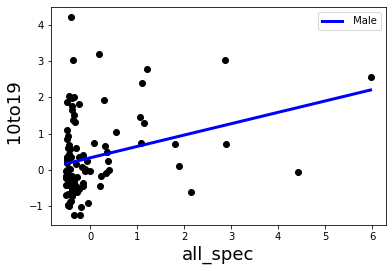

MAE: 0.7671604488476889
r2: 0.08658309837185063


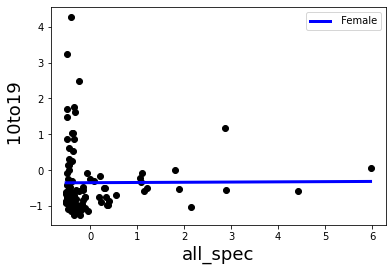

MAE: 0.6208811434736046
r2: 3.9266487997124955e-05


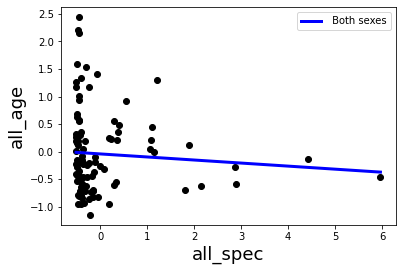

MAE: 0.5823019991636419
r2: 0.005510781045115931


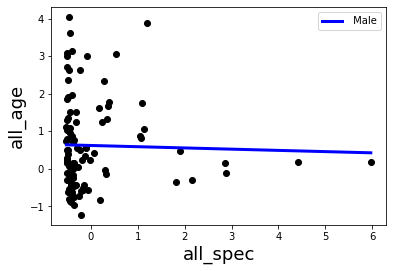

MAE: 0.9419638329989664
r2: 0.000760566095744819


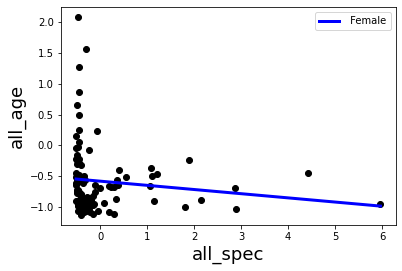

MAE: 0.3690486896843543
r2: 0.015237500725599706


In [26]:
regr = linear_model.LinearRegression()
X = ['Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists','all_spec']
Y = [' 80_above', ' 70to79', ' 60to69 ', ' 50to59 ', ' 40to49', ' 30to39', ' 20to29', ' 10to19','all_age']
Z = [' Both sexes', ' Male', ' Female']

for x in X:
    for y in Y:
        for z in Z:
            data = normalized[normalized['Sex'] == z][[' 80_above', ' 70to79', ' 60to69 ', ' 50to59 ', ' 40to49', ' 30to39', ' 20to29', ' 10to19', 'Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists', 'all_age', 'all_spec']].sort_values(by = x)
            regr = linear_model.LinearRegression()
            regr.fit(data[[x]], data[[y]])
            y_pred = regr.predict(data[[x]])
            plt.scatter(data[[x]], data[[y]],  color='black')
            plt.plot(data[[x]], y_pred , color='blue', linewidth=3)
            plt.xlabel(x, fontsize=18)
            plt.ylabel(y, fontsize=18)
            plt.legend([z])
            plt.show()
            print("MAE:",metrics.mean_absolute_error(data[[y]], y_pred))
            print("r2:",metrics.r2_score(data[[y]], y_pred))

#svr_poly.fit(data[[x]], data[[y]])

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


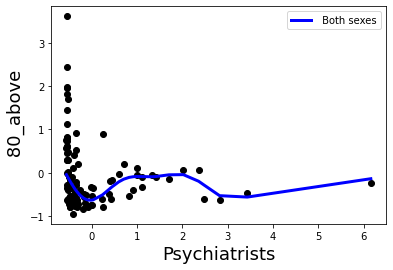

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


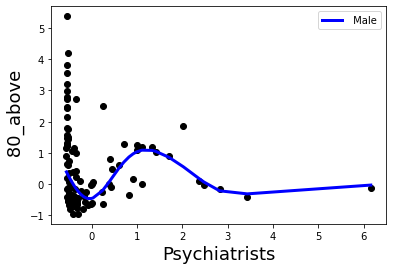

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


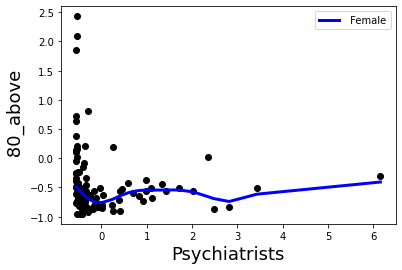

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


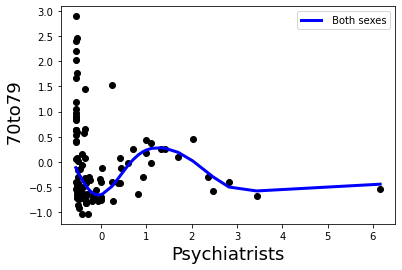

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


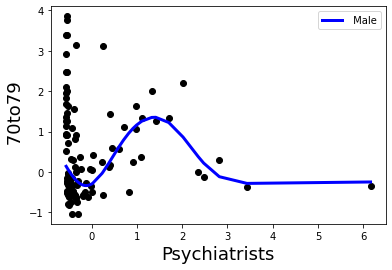

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


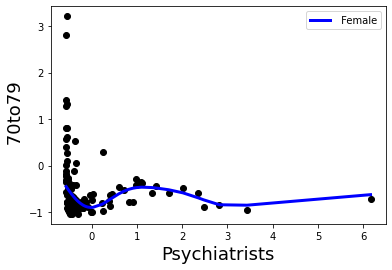

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


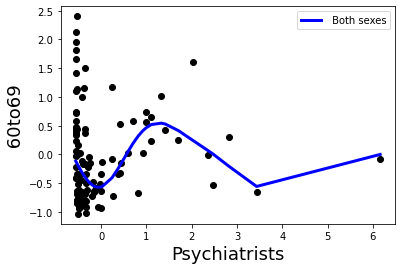

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


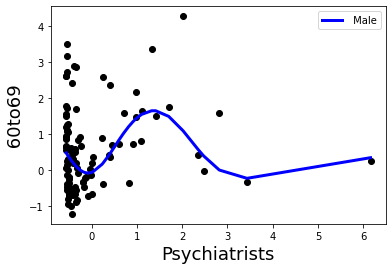

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


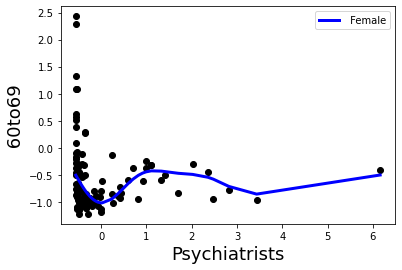

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


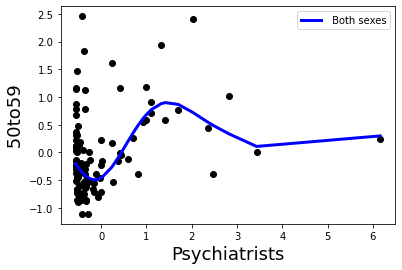

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


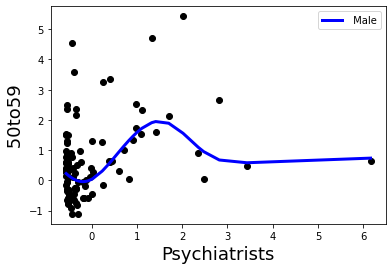

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


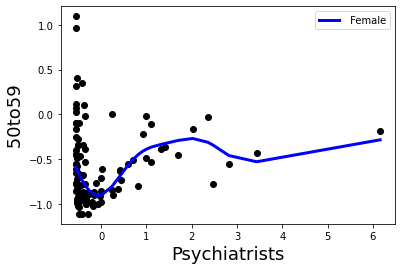

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


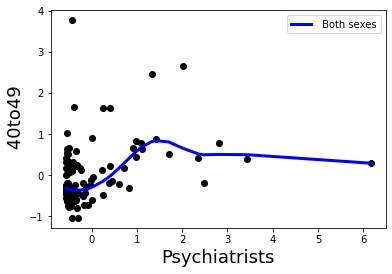

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


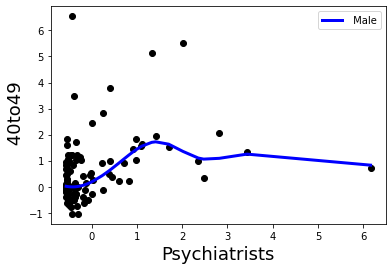

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


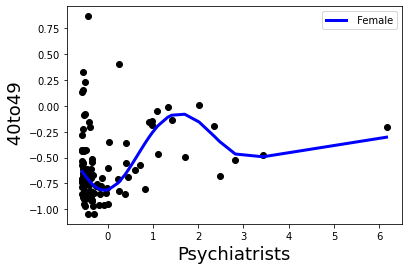

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


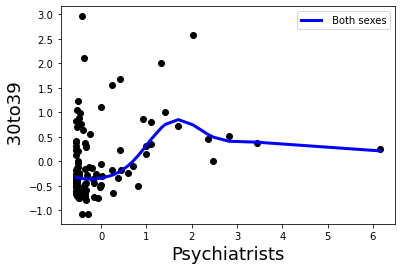

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


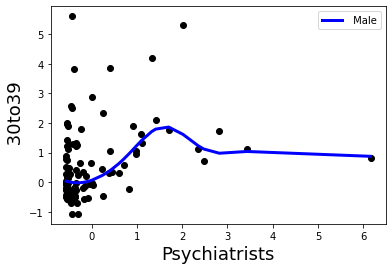

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


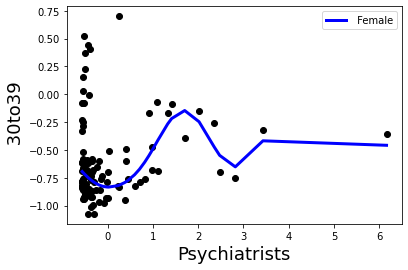

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


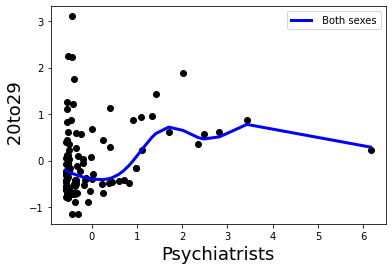

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


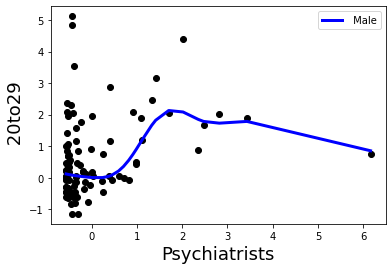

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


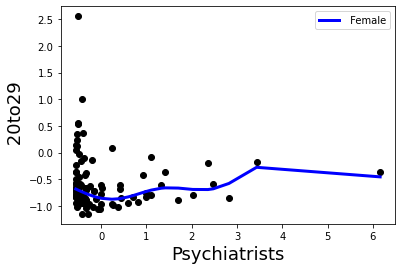

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


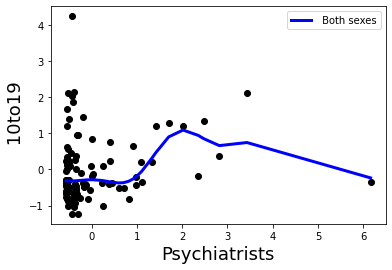

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


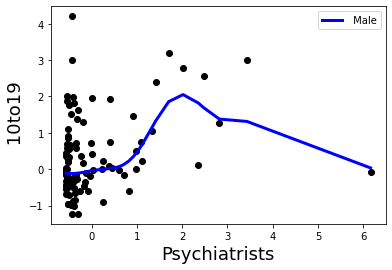

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


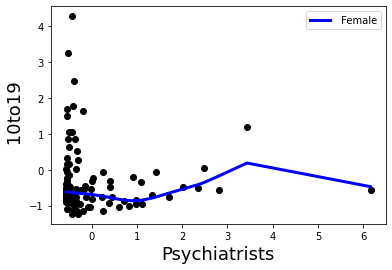

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


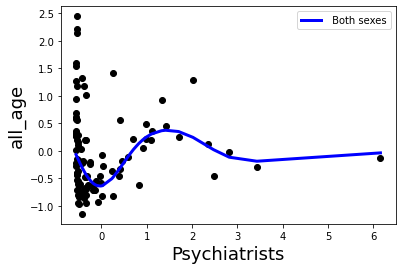

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


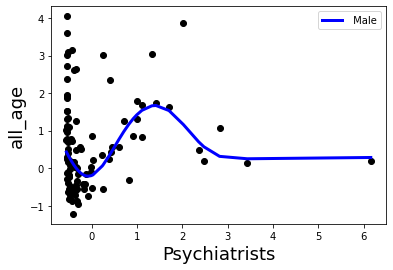

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


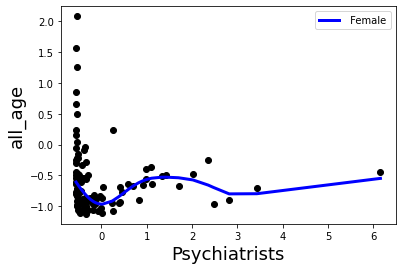

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


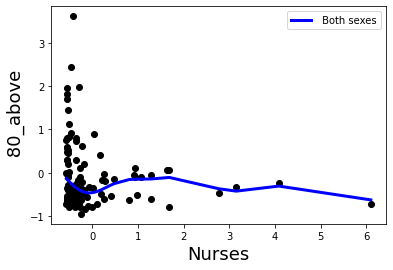

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


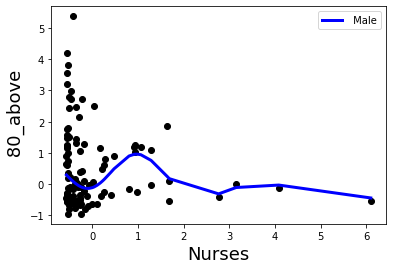

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


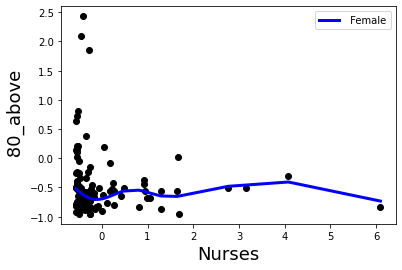

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


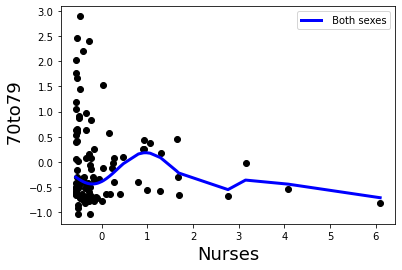

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


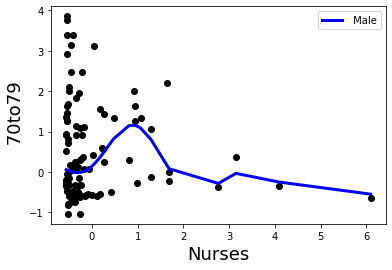

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


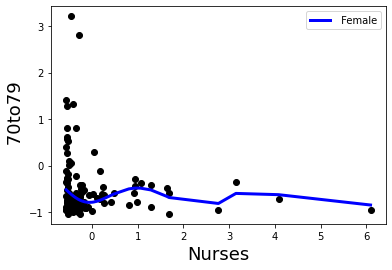

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


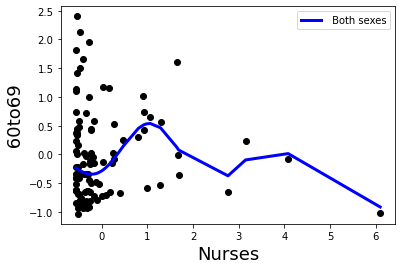

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


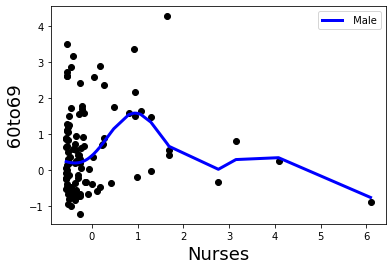

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


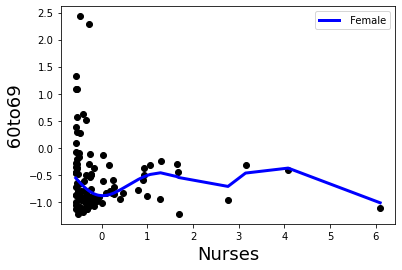

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


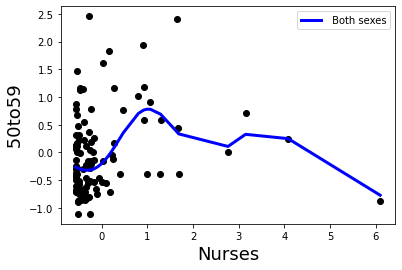

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


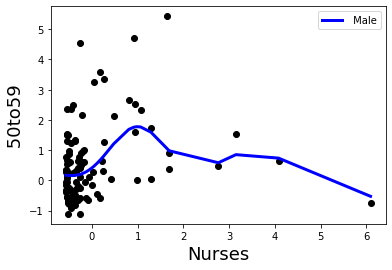

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


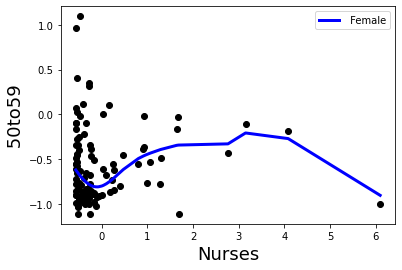

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


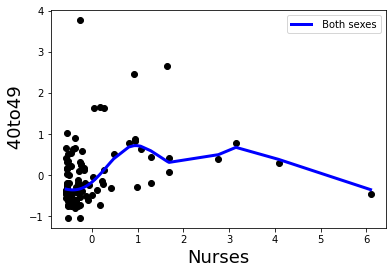

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


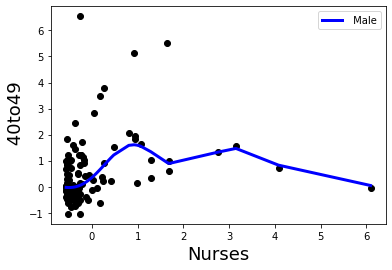

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


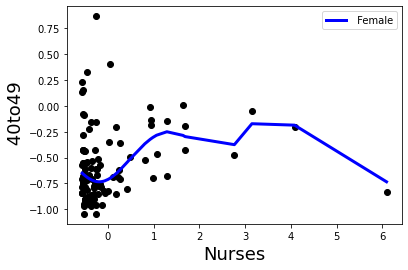

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


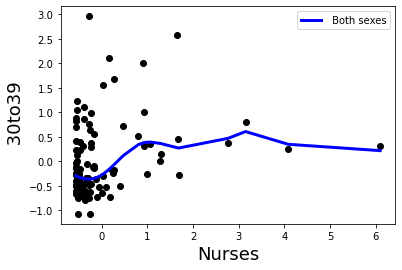

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


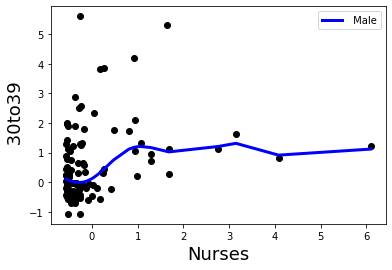

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


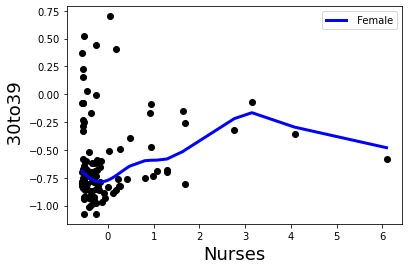

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


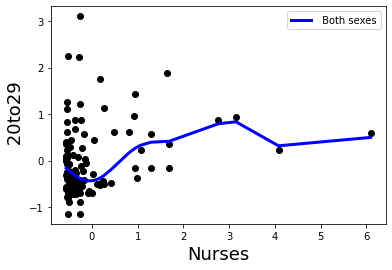

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


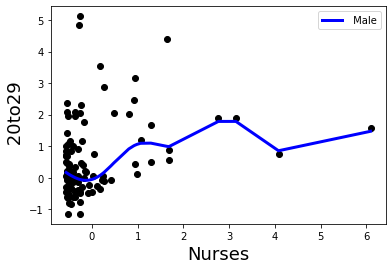

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


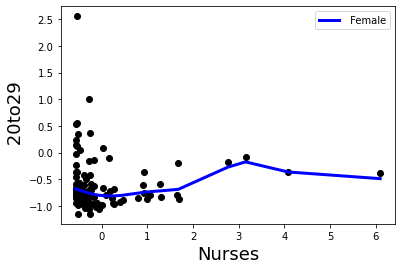

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


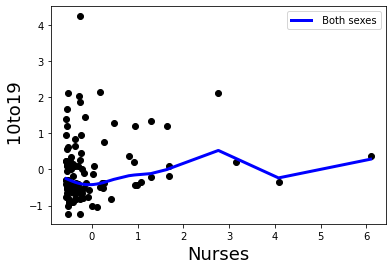

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


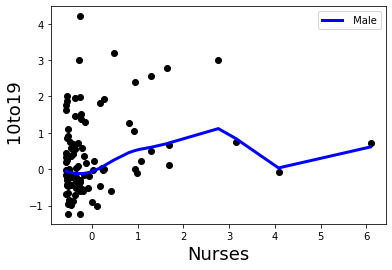

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


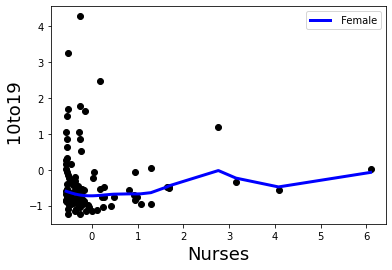

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


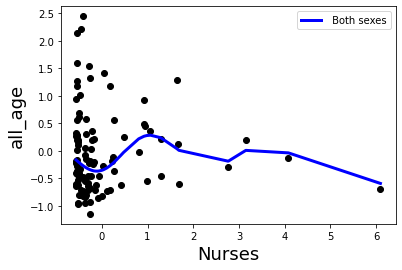

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


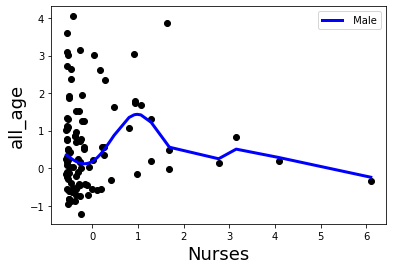

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


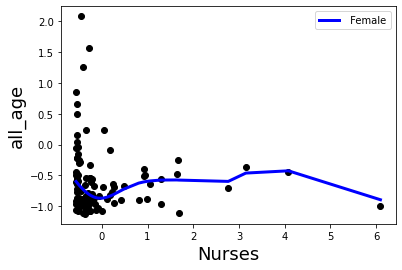

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


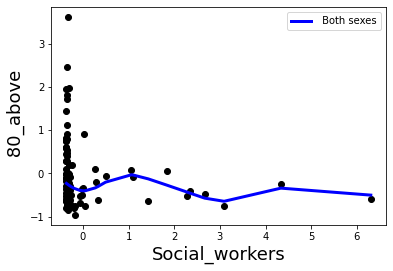

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


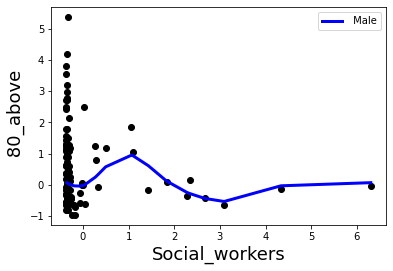

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


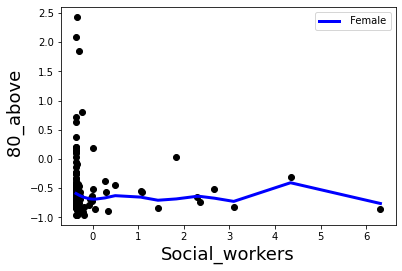

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


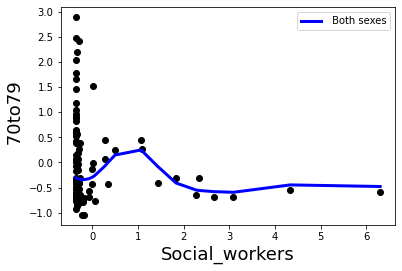

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


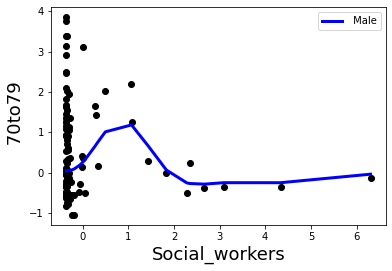

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


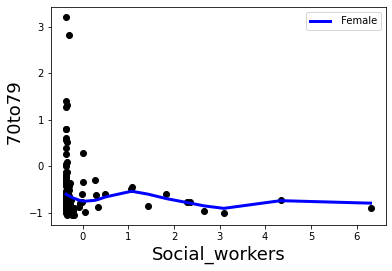

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


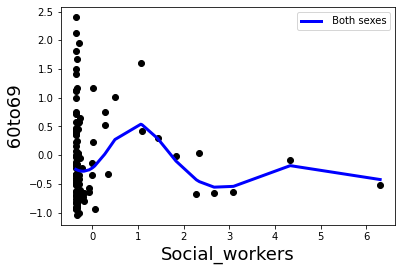

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


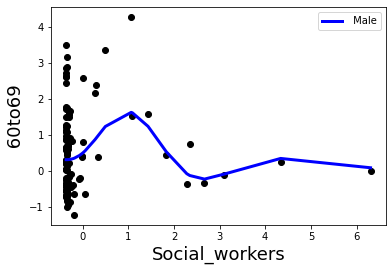

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


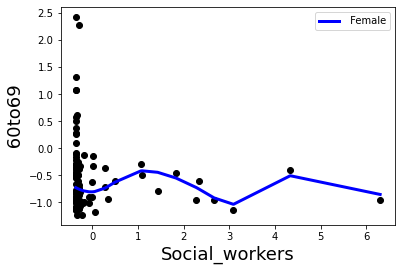

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


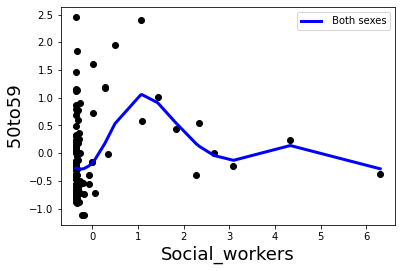

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


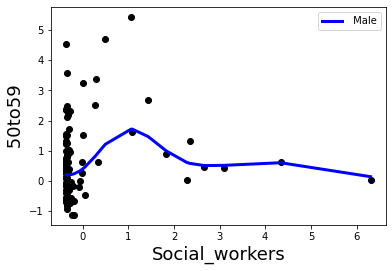

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


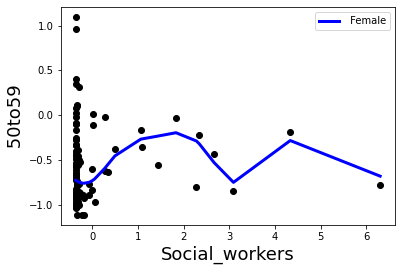

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


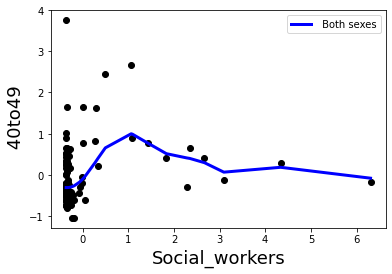

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


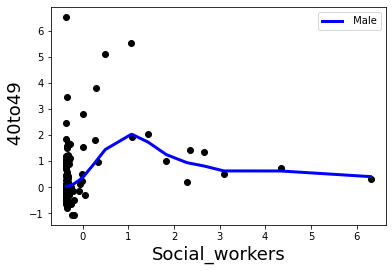

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


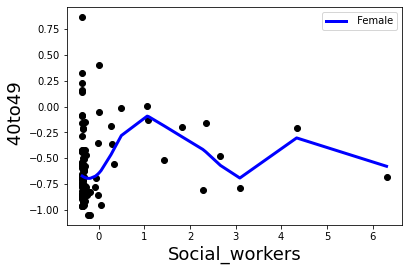

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


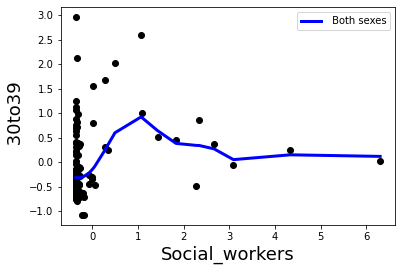

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


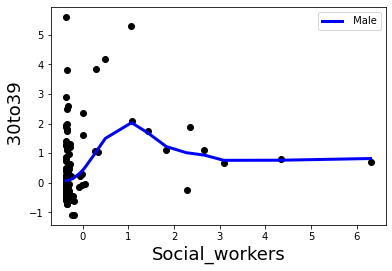

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


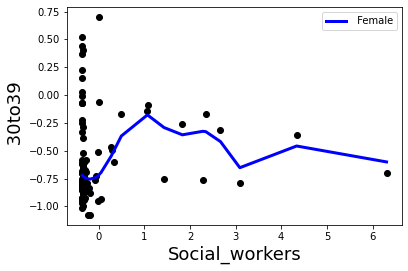

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


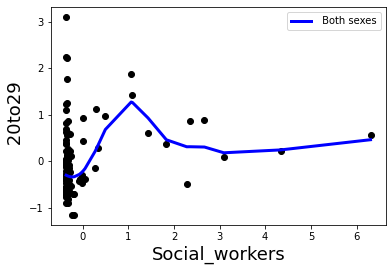

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


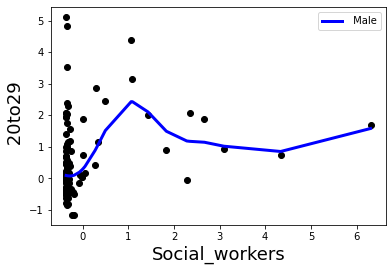

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


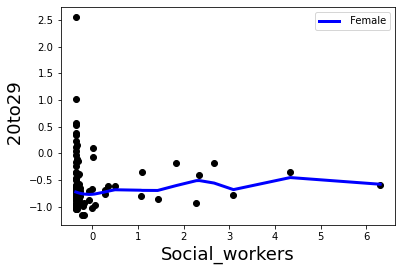

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


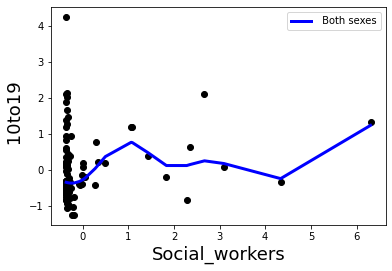

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


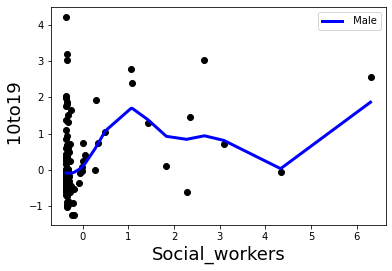

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


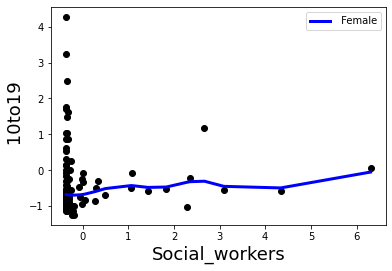

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


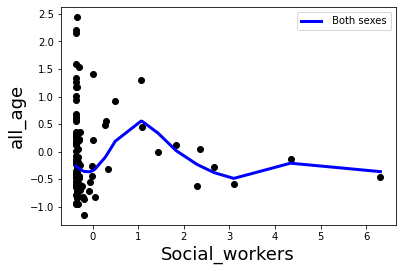

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


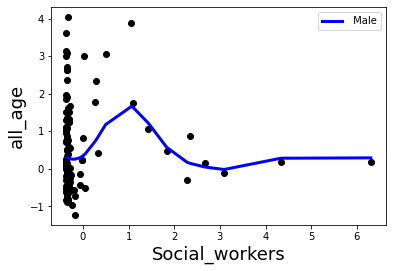

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


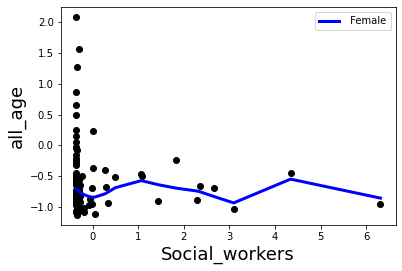

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


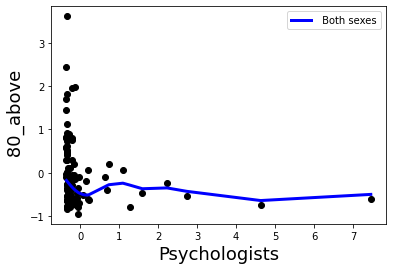

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


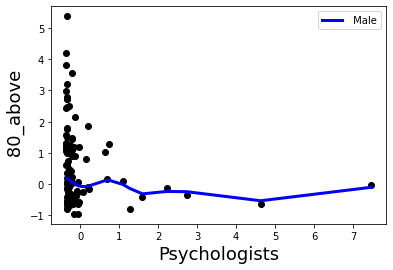

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


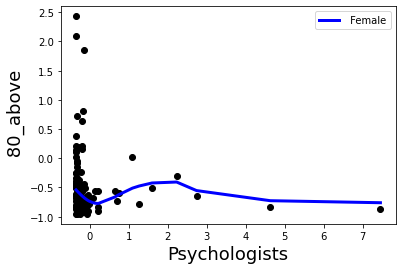

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


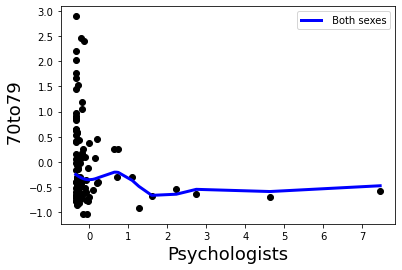

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


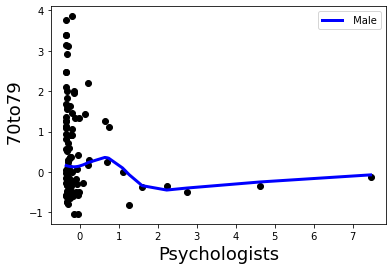

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


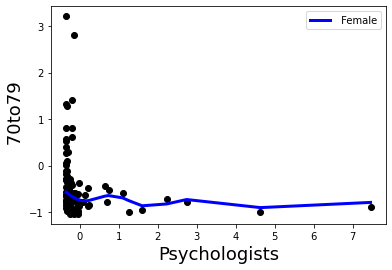

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


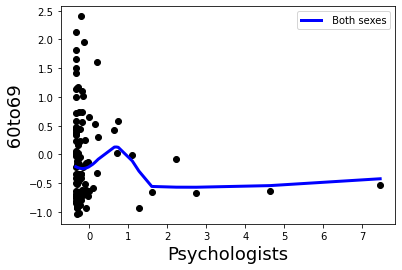

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


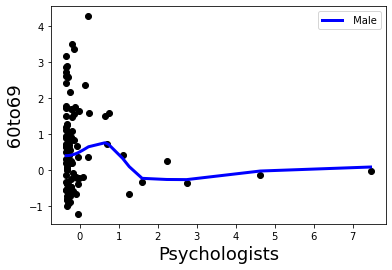

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


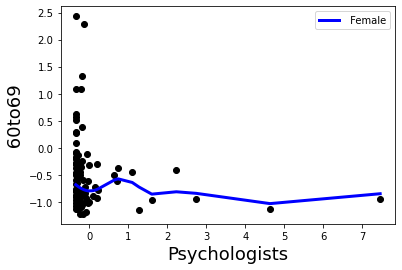

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


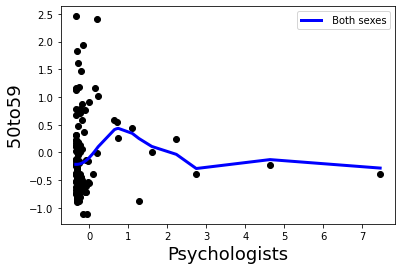

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


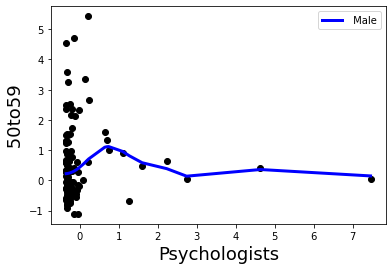

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


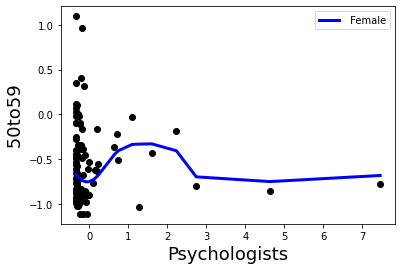

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


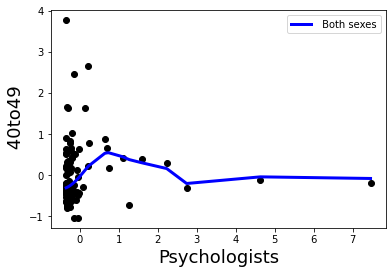

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


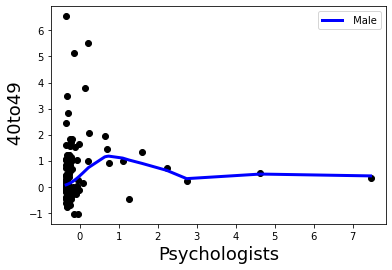

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


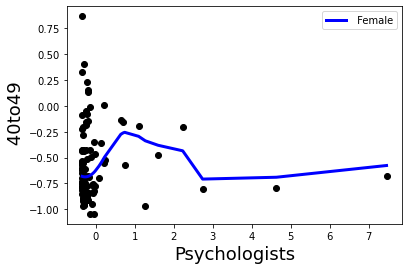

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


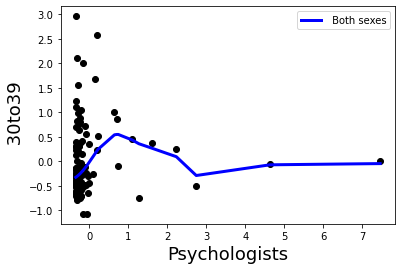

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


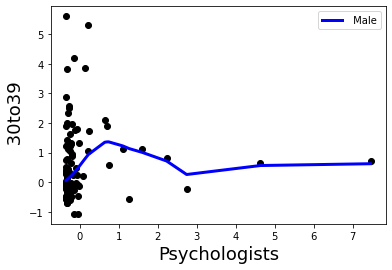

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


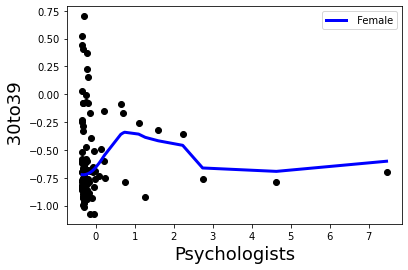

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


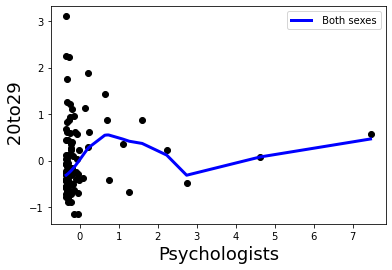

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


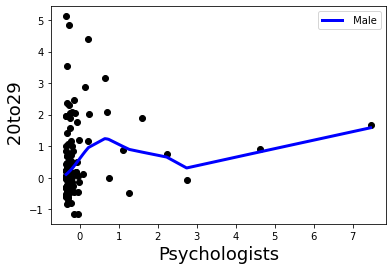

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


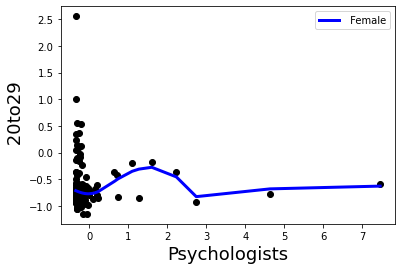

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


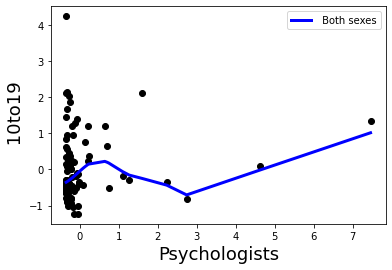

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


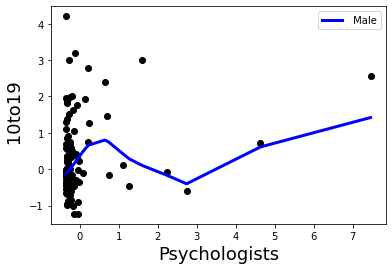

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


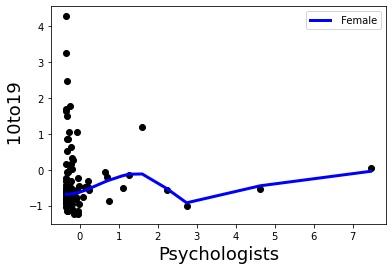

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


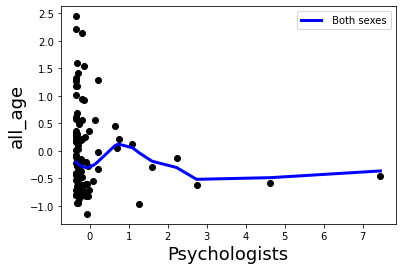

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


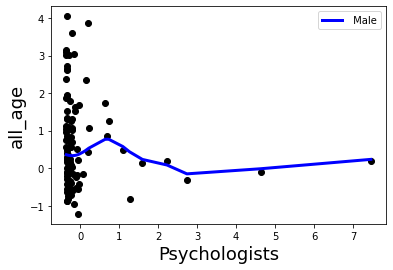

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


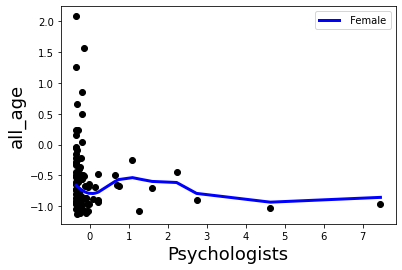

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


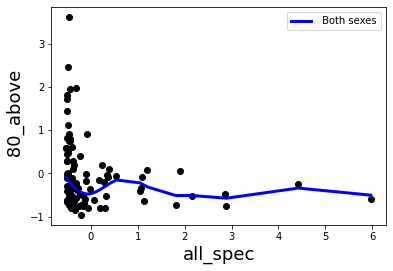

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


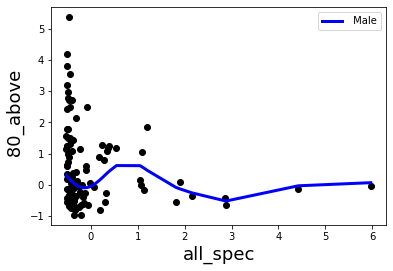

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


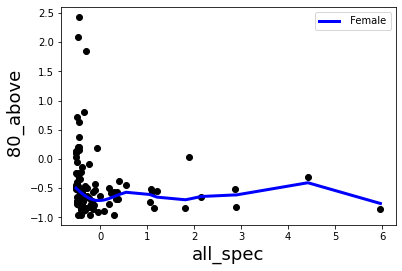

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


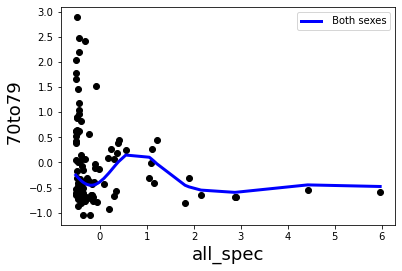

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


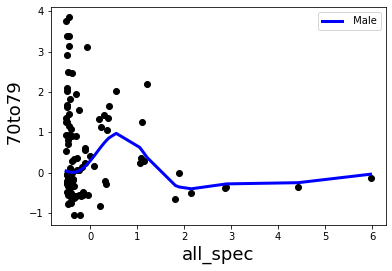

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


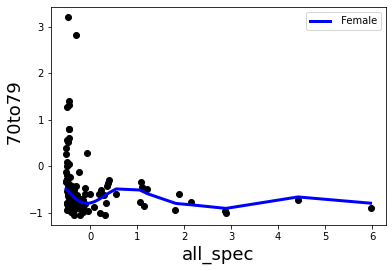

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


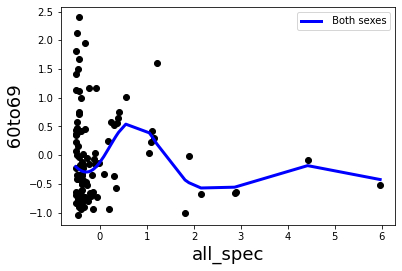

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


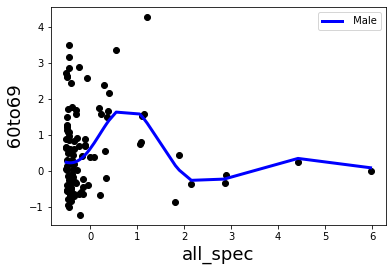

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


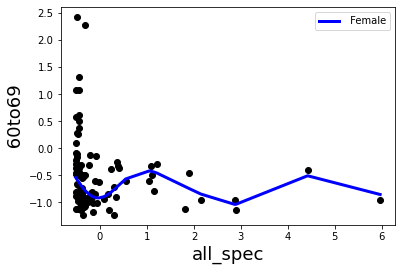

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


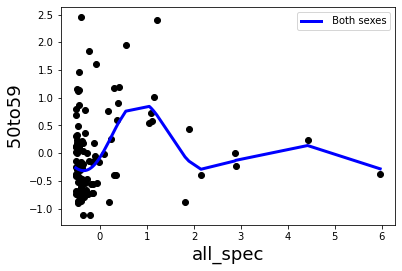

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


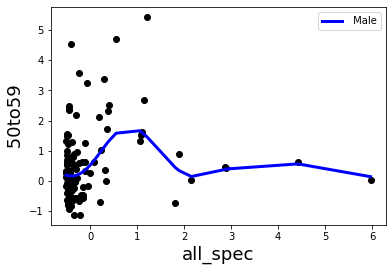

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


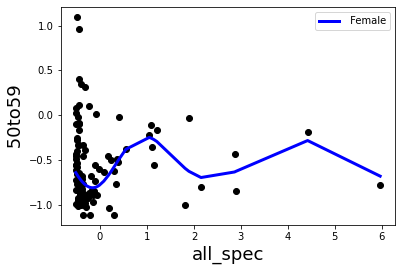

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


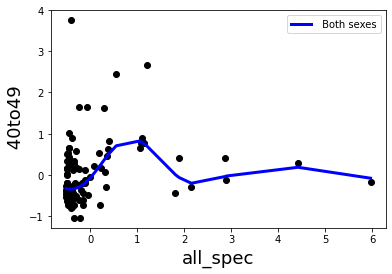

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


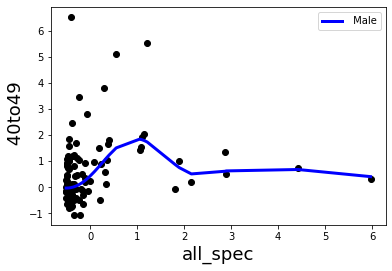

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


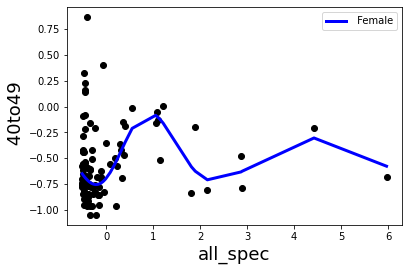

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


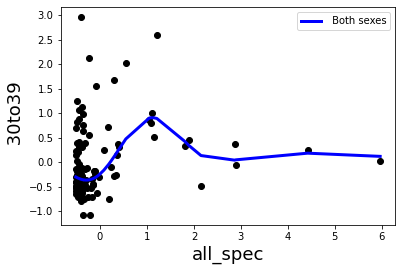

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


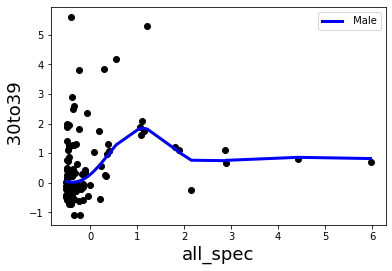

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


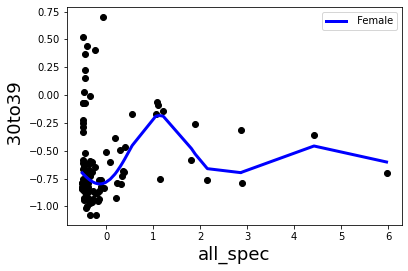

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


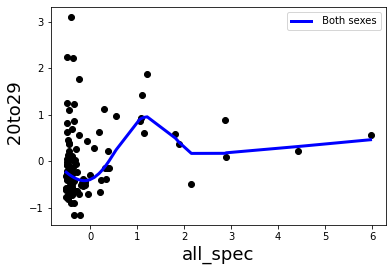

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


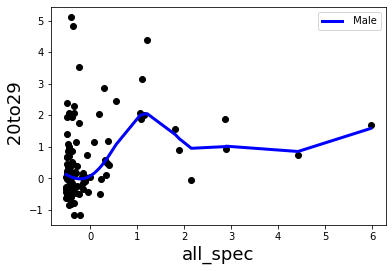

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


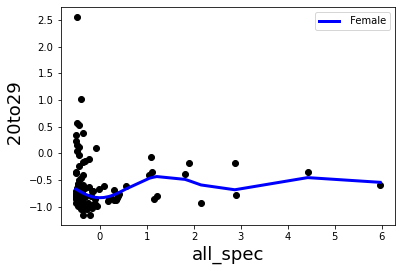

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


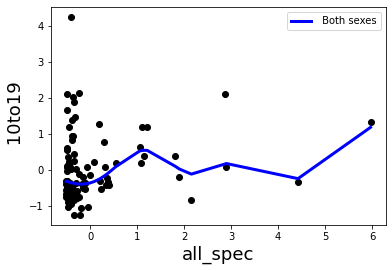

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


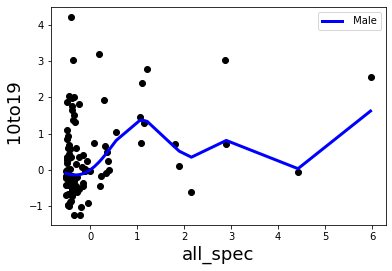

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


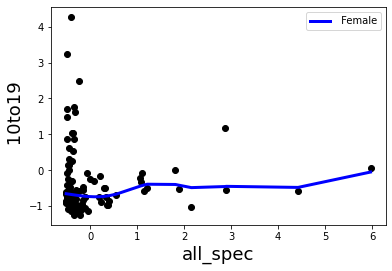

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


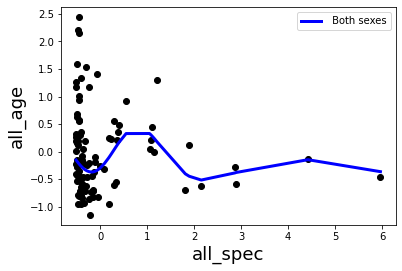

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


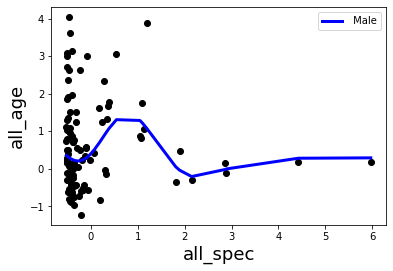

C:\Users\Orest\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


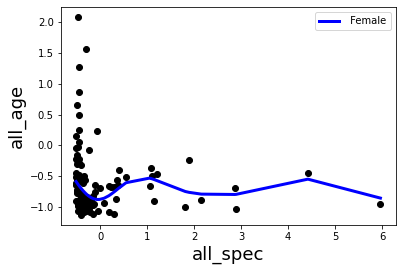

In [27]:
svr_lin = SVR(kernel='rbf', C=1.0, gamma='auto')
for x in X:
    for y in Y:
        for z in Z:
            data = normalized[normalized['Sex'] == z][[' 80_above', ' 70to79', ' 60to69 ', ' 50to59 ', ' 40to49', ' 30to39', ' 20to29', ' 10to19', 'Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists', 'all_age', 'all_spec']].sort_values(by = x)
            svr_lin.fit(data[[x]], data[[y]])

            male_y_pred = svr_lin.predict(data[[x]])
            plt.scatter(data[[x]], data[[y]],  color='black')
            plt.plot(data[[x]], male_y_pred , color='blue', linewidth=3)
            plt.xlabel(x, fontsize=18)
            plt.ylabel(y, fontsize=18)
            plt.legend([z])
            plt.show()


# PCA

In [28]:
from sklearn.decomposition import PCA
from copy import copy, deepcopy

In [29]:
normalized

Country          Sex   80_above    70to79  \
0                         Afghanistan   Both sexes  -0.019805 -0.601763   
1                         Afghanistan         Male   0.610997 -0.208432   
2                         Afghanistan       Female  -0.506234 -0.947418   
3                             Albania   Both sexes  -0.590637 -0.709036   
4                             Albania         Male  -0.437378 -0.566006   
5                             Albania       Female  -0.710578 -0.844119   
6                              Angola   Both sexes   0.457739  0.633853   
7                              Angola         Male   1.783756  1.670818   
8                              Angola       Female  -0.390735 -0.176648   
9                 Antigua and Barbuda   Both sexes  -0.952682 -1.038798   
10                Antigua and Barbuda         Male  -0.952682 -1.038798   
11                Antigua and Barbuda       Female  -0.952682 -1.038798   
12                          Argentina   Both sexes  -0.601742 -0.577925   
13                          Argentina         Male  -0.028690 -0.136917   
14                          Argentina       Female  -0.861615 -0.891796   
15                            Armenia   Both sexes  -0.332985 -0.347489   
16                            Armenia         Male  -0.042016  0.077627   
17                            Armenia       Female  -0.504012 -0.625602   
18                         Azerbaijan   Both sexes  -0.781654 -0.776577   
19                         Azerbaijan         Male  -0.675040 -0.625602   
20                         Azerbaijan       Female  -0.841625 -0.879876   
21                         Bangladesh   Both sexes  -0.286341 -0.530249   
22                         Bangladesh         Male   0.188982 -0.275974   
23                         Bangladesh       Female  -0.726126 -0.784523   
24                            Belarus   Both sexes  -0.050901  0.248468   
25                            Belarus         Male   1.181829  2.012500   
26                            Belarus       Female  -0.444042 -0.585871   
27                             Belize   Both sexes  -0.455147 -0.323650   
28                             Belize         Male  -0.148631  0.113385   
29                             Belize       Female  -0.721684 -0.760685   
30                             Bhutan   Both sexes  -0.532887 -0.494491   
31                             Bhutan         Male  -0.315216 -0.359408   
32                             Bhutan       Female  -0.781654 -0.657386   
33   Bolivia (Plurinational State of)   Both sexes  -0.639502 -0.506410   
34   Bolivia (Plurinational State of)         Male  -0.521782 -0.323650   
35   Bolivia (Plurinational State of)       Female  -0.726126 -0.673278   
36                             Brazil   Both sexes  -0.519560 -0.566006   
37                             Brazil         Male  -0.244140 -0.268028   
38                             Brazil       Female  -0.679482 -0.788496   
39                  Brunei Darussalam   Both sexes  -0.719462 -0.649440   
40                  Brunei Darussalam         Male  -0.650607 -0.585871   
41                  Brunei Darussalam       Female  -0.772770 -0.705063   
42                           Bulgaria   Both sexes  -0.168621 -0.117052   
43                           Bulgaria         Male   0.479950  0.602069   
44                           Bulgaria       Female  -0.532887 -0.601763   
45                       Burkina Faso   Both sexes   1.446144  1.662872   
46                       Burkina Faso         Male   3.816094  3.395119   
47                       Burkina Faso       Female   0.100136  0.570285   
48                           Cambodia   Both sexes  -0.608406 -0.518329   
49                           Cambodia         Male  -0.386292 -0.180621   
50                           Cambodia       Female  -0.746116 -0.744793   
51                               Chad   Both sexes   0.753150  1.182133   
52                               Chad         Male   0.

In [30]:
pca = PCA(n_components=0.90)
spec_columns = ['Psychiatrists', 'Nurses', 'Social_workers', 'Psychologists']
suicide_columns = [' 80_above', ' 70to79', ' 60to69 ', ' 50to59 ', ' 40to49', ' 30to39', ' 20to29', ' 10to19']

normalized_spec = normalized[normalized['Sex'] == ' Both sexes'].drop(suicide_columns + ['all_age', 'all_spec'], axis = 1)
normalized_suicide = normalized[normalized['Sex'] == ' Both sexes'].drop(spec_columns + ['all_age', 'all_spec'], axis = 1)

pca = PCA(0.95).fit(normalized_spec[(spec_columns)])
components = pca.transform(normalized_spec[(spec_columns)])
filtered = pca.inverse_transform(components)
restored_spec = copy(normalized_spec)


for i in range(len(spec_columns)):
    restored_spec[(spec_columns)[i]] = filtered.T[i]
    
normalized_spec

Country          Sex  Psychiatrists    Nurses  \
0                         Afghanistan   Both sexes      -0.529141 -0.559881   
3                             Albania   Both sexes      -0.355645 -0.259497   
6                              Angola   Both sexes      -0.553486 -0.534974   
9                 Antigua and Barbuda   Both sexes      -0.421406 -0.253780   
12                          Argentina   Both sexes       2.475407  1.286426   
15                            Armenia   Both sexes      -0.024185 -0.065874   
18                         Azerbaijan   Both sexes      -0.078472 -0.266543   
21                         Bangladesh   Both sexes      -0.543272 -0.525535   
24                            Belarus   Both sexes       1.327959  0.916013   
27                             Belize   Both sexes      -0.366699 -0.416204   
30                             Bhutan   Both sexes      -0.490384 -0.558596   
33   Bolivia (Plurinational State of)   Both sexes      -0.403636 -0.259063   
36                             Brazil   Both sexes      -0.118628  0.984584   
39                  Brunei Darussalam   Both sexes      -0.393982  0.104438   
42                           Bulgaria   Both sexes       0.446351  0.221791   
45                       Burkina Faso   Both sexes      -0.556004 -0.536082   
48                           Cambodia   Both sexes      -0.507314 -0.551948   
51                               Chad   Both sexes      -0.560482 -0.563293   
54                              Chile   Both sexes       0.413751 -0.480907   
57                           Colombia   Both sexes      -0.304716 -0.564224   
60                              Congo   Both sexes      -0.550268 -0.542065   
63                         Costa Rica   Both sexes      -0.011453 -0.311659   
66                      Côte d'Ivoire   Both sexes      -0.543272 -0.547339   
69                            Croatia   Both sexes       0.990903  1.290729   
72                               Cuba   Both sexes       0.705615 -0.169843   
75                 Dominican Republic   Both sexes      -0.242454 -0.172202   
78                            Ecuador   Both sexes      -0.497380 -0.561742   
81                              Egypt   Both sexes      -0.337596 -0.351544   
84                        El Salvador   Both sexes      -0.437356 -0.278316   
87                            Eritrea   Both sexes      -0.346522 -0.468232   
90                            Estonia   Both sexes       1.703493  0.476528   
93                               Fiji   Both sexes      -0.530120 -0.499653   
96                              Gabon   Both sexes      -0.525223 -0.541268   
99                             Gambia   Both sexes      -0.547330 -0.550796   
102                           Georgia   Both sexes       0.376813 -0.301776   
105                             Ghana   Both sexes      -0.553346 -0.221517   
108                            Greece   Both sexes       0.250469  0.000735   
111                           Grenada   Both sexes      -0.299539 -0.522743   
114                         Guatemala   Both sexes      -0.492623 -0.516760   
117                            Guinea   Both sexes      -0.557963 -0.349922   
120                     Guinea-Bissau   Both sexes      -0.359456 -0.529169   
123                            Guyana   Both sexes      -0.433998 -0.269493   
126                             Haiti   Both sexes      -0.550967 -0.553898   
129                           Hungary   Both sexes       0.988664  0.931004   
132                             India   Both sexes      -0.520606 -0.528947   
135                         Indonesia   Both sexes      -0.518087 -0.452633   
138                            Israel   Both sexes       0.819506  0.412693   
141                             Japan   Both sexes       1.098917  3.149804   
144                            Jordan   Both sexes      -0.404056 -0.418109   
147                             Kenya   Both sexes      -0.535717 -0.349535   
1

In [31]:
restored_spec

Country          Sex  Psychiatrists    Nurses  \
0                         Afghanistan   Both sexes      -0.506692 -0.562197   
3                             Albania   Both sexes      -0.342810 -0.260821   
6                              Angola   Both sexes      -0.527078 -0.537700   
9                 Antigua and Barbuda   Both sexes      -0.413159 -0.254631   
12                          Argentina   Both sexes       2.450249  1.289022   
15                            Armenia   Both sexes      -0.051674 -0.063037   
18                         Azerbaijan   Both sexes      -0.106511 -0.263650   
21                         Bangladesh   Both sexes      -0.517777 -0.528166   
24                            Belarus   Both sexes       1.346971  0.914051   
27                             Belize   Both sexes      -0.365720 -0.416305   
30                             Bhutan   Both sexes      -0.492345 -0.558393   
33   Bolivia (Plurinational State of)   Both sexes      -0.405013 -0.258921   
36                             Brazil   Both sexes      -0.126173  0.985363   
39                  Brunei Darussalam   Both sexes      -0.406532  0.105733   
42                           Bulgaria   Both sexes       0.369236  0.229749   
45                       Burkina Faso   Both sexes      -0.528449 -0.538926   
48                           Cambodia   Both sexes      -0.513756 -0.551283   
51                               Chad   Both sexes      -0.559748 -0.563369   
54                              Chile   Both sexes       0.409723 -0.480492   
57                           Colombia   Both sexes      -0.309923 -0.563687   
60                              Congo   Both sexes      -0.523296 -0.544849   
63                         Costa Rica   Both sexes      -0.078211 -0.304770   
66                      Côte d'Ivoire   Both sexes      -0.542991 -0.547368   
69                            Croatia   Both sexes       0.855897  1.304661   
72                               Cuba   Both sexes       0.414390 -0.139791   
75                 Dominican Republic   Both sexes      -0.290667 -0.167227   
78                            Ecuador   Both sexes      -0.525532 -0.558837   
81                              Egypt   Both sexes      -0.328486 -0.352484   
84                        El Salvador   Both sexes      -0.429804 -0.279095   
87                            Eritrea   Both sexes      -0.341270 -0.468774   
90                            Estonia   Both sexes       1.458788  0.501780   
93                               Fiji   Both sexes      -0.502209 -0.502534   
96                              Gabon   Both sexes      -0.504901 -0.543365   
99                             Gambia   Both sexes      -0.546729 -0.550858   
102                           Georgia   Both sexes       0.378109 -0.301910   
105                             Ghana   Both sexes      -0.522917 -0.224657   
108                            Greece   Both sexes       0.178433  0.008169   
111                           Grenada   Both sexes      -0.302571 -0.522430   
114                         Guatemala   Both sexes      -0.768087 -0.488334   
117                            Guinea   Both sexes      -0.528026 -0.353011   
120                     Guinea-Bissau   Both sexes      -0.352212 -0.529916   
123                            Guyana   Both sexes      -0.416812 -0.271267   
126                             Haiti   Both sexes      -0.523507 -0.556732   
129                           Hungary   Both sexes       1.007235  0.929088   
132                             India   Both sexes      -0.496548 -0.531430   
135                         Indonesia   Both sexes      -0.494860 -0.455029   
138                            Israel   Both sexes       0.810152  0.413658   
141                             Japan   Both sexes       1.061599  3.153655   
144                            Jordan   Both sexes      -0.397498 -0.418786   
147                             Kenya   Both sexes      -0.532795 -0.349837   
1

In [32]:
pca = PCA(0.95).fit(normalized_suicide[(suicide_columns)])
components = pca.transform(normalized_suicide[(suicide_columns)])
filtered = pca.inverse_transform(components)
restored_suicide = copy(normalized_suicide)
normalized_suicide

Country          Sex   80_above    70to79  \
0                         Afghanistan   Both sexes  -0.019805 -0.601763   
3                             Albania   Both sexes  -0.590637 -0.709036   
6                              Angola   Both sexes   0.457739  0.633853   
9                 Antigua and Barbuda   Both sexes  -0.952682 -1.038798   
12                          Argentina   Both sexes  -0.601742 -0.577925   
15                            Armenia   Both sexes  -0.332985 -0.347489   
18                         Azerbaijan   Both sexes  -0.781654 -0.776577   
21                         Bangladesh   Both sexes  -0.286341 -0.530249   
24                            Belarus   Both sexes  -0.050901  0.248468   
27                             Belize   Both sexes  -0.455147 -0.323650   
30                             Bhutan   Both sexes  -0.532887 -0.494491   
33   Bolivia (Plurinational State of)   Both sexes  -0.639502 -0.506410   
36                             Brazil   Both sexes  -0.519560 -0.566006   
39                  Brunei Darussalam   Both sexes  -0.719462 -0.649440   
42                           Bulgaria   Both sexes  -0.168621 -0.117052   
45                       Burkina Faso   Both sexes   1.446144  1.662872   
48                           Cambodia   Both sexes  -0.608406 -0.518329   
51                               Chad   Both sexes   0.753150  1.182133   
54                              Chile   Both sexes  -0.612848 -0.422976   
57                           Colombia   Both sexes  -0.728347 -0.637521   
60                              Congo   Both sexes   0.288933  0.423282   
63                         Costa Rica   Both sexes  -0.743895 -0.693143   
66                      Côte d'Ivoire   Both sexes   1.950341  2.473373   
69                            Croatia   Both sexes  -0.044238  0.180926   
72                               Cuba   Both sexes   0.200087  0.260387   
75                 Dominican Republic   Both sexes  -0.464032 -0.371327   
78                            Ecuador   Both sexes  -0.586194 -0.609709   
81                              Egypt   Both sexes  -0.761664 -0.780550   
84                        El Salvador   Both sexes  -0.641723 -0.601763   
87                            Eritrea   Both sexes   0.915292  1.456273   
90                            Estonia   Both sexes  -0.148631  0.085573   
93                               Fiji   Both sexes   0.015733 -0.470653   
96                              Gabon   Both sexes   0.477729  0.594123   
99                             Gambia   Both sexes   0.799793  1.047050   
102                           Georgia   Both sexes  -0.488464 -0.430922   
105                             Ghana   Both sexes   0.617660  0.824559   
108                            Greece   Both sexes  -0.792760 -0.784523   
111                           Grenada   Both sexes   0.193424 -1.038798   
114                         Guatemala   Both sexes  -0.788318 -0.927553   
117                            Guinea   Both sexes   0.790909  0.967589   
120                     Guinea-Bissau   Both sexes   0.533257  0.645772   
123                            Guyana   Both sexes  -0.095324  0.145169   
126                             Haiti   Both sexes  -0.619511 -0.534222   
129                           Hungary   Both sexes   0.100136  0.443147   
132                             India   Both sexes  -0.408504 -0.168702   
135                         Indonesia   Both sexes  -0.632838 -0.724928   
138                            Israel   Both sexes  -0.530666 -0.649440   
141                             Japan   Both sexes  -0.335206 -0.017726   
144                            Jordan   Both sexes  -0.535108 -0.645467   
147                             Kenya   Both sexes   0.295596  0.073654   
150                        Kyrgyzstan   Both sexes  -0.635059 -0.681224   
153                           Liberia   Both sexes   1.981437  2.413777   
156                         Lithuania   Both sexes   0.

In [33]:
for i in range(len(suicide_columns)):
    restored_suicide[(suicide_columns)[i]] = filtered.T[i]
restored_suicide

Country          Sex   80_above    70to79  \
0                         Afghanistan   Both sexes  -0.415817 -0.494713   
3                             Albania   Both sexes  -0.619699 -0.702320   
6                              Angola   Both sexes   0.601596  0.592741   
9                 Antigua and Barbuda   Both sexes  -0.807676 -0.945104   
12                          Argentina   Both sexes  -0.495399 -0.580005   
15                            Armenia   Both sexes  -0.361379 -0.399755   
18                         Azerbaijan   Both sexes  -0.737854 -0.842734   
21                         Bangladesh   Both sexes  -0.331886 -0.480555   
24                            Belarus   Both sexes  -0.215050  0.295247   
27                             Belize   Both sexes  -0.270190 -0.311717   
30                             Bhutan   Both sexes  -0.673286 -0.542832   
33   Bolivia (Plurinational State of)   Both sexes  -0.496758 -0.487402   
36                             Brazil   Both sexes  -0.555486 -0.580700   
39                  Brunei Darussalam   Both sexes  -0.713823 -0.739967   
42                           Bulgaria   Both sexes  -0.151613 -0.132652   
45                       Burkina Faso   Both sexes   1.500385  1.628408   
48                           Cambodia   Both sexes  -0.563708 -0.608591   
51                               Chad   Both sexes   0.932364  1.089344   
54                              Chile   Both sexes  -0.549987 -0.499570   
57                           Colombia   Both sexes  -0.552486 -0.663812   
60                              Congo   Both sexes   0.375193  0.405365   
63                         Costa Rica   Both sexes  -0.719600 -0.729962   
66                      Côte d'Ivoire   Both sexes   2.156851  2.409608   
69                            Croatia   Both sexes   0.084513  0.230814   
72                               Cuba   Both sexes   0.258607  0.353200   
75                 Dominican Republic   Both sexes  -0.484763 -0.412872   
78                            Ecuador   Both sexes  -0.453066 -0.595528   
81                              Egypt   Both sexes  -0.742674 -0.815582   
84                        El Salvador   Both sexes  -0.593727 -0.626479   
87                            Eritrea   Both sexes   1.234299  1.411152   
90                            Estonia   Both sexes  -0.030962  0.083119   
93                               Fiji   Both sexes  -0.379864 -0.456092   
96                              Gabon   Both sexes   0.603740  0.583883   
99                             Gambia   Both sexes   0.971318  0.966845   
102                           Georgia   Both sexes  -0.430996 -0.429517   
105                             Ghana   Both sexes   0.709604  0.700977   
108                            Greece   Both sexes  -0.765891 -0.806999   
111                           Grenada   Both sexes  -0.234189 -0.382116   
114                         Guatemala   Both sexes  -0.768765 -0.905232   
117                            Guinea   Both sexes   0.895322  0.915636   
120                     Guinea-Bissau   Both sexes   0.623351  0.581009   
123                            Guyana   Both sexes  -0.248415  0.257525   
126                             Haiti   Both sexes  -0.573670 -0.590345   
129                           Hungary   Both sexes   0.210027  0.453335   
132                             India   Both sexes  -0.316895 -0.258556   
135                         Indonesia   Both sexes  -0.628569 -0.728039   
138                            Israel   Both sexes  -0.616002 -0.638577   
141                             Japan   Both sexes  -0.288537 -0.092371   
144                            Jordan   Both sexes  -0.609042 -0.686981   
147                             Kenya   Both sexes   0.149889  0.075146   
150                        Kyrgyzstan   Both sexes  -0.644314 -0.645313   
153                           Liberia   Both sexes   2.242014  2.295824   
156                         Lithuania   Both sexes   0.

In [34]:
restored = pd.merge(restored_suicide, restored_spec, on=["Country", "Sex"])
restored

Country          Sex   80_above    70to79  \
0                         Afghanistan   Both sexes  -0.415817 -0.494713   
1                             Albania   Both sexes  -0.619699 -0.702320   
2                              Angola   Both sexes   0.601596  0.592741   
3                 Antigua and Barbuda   Both sexes  -0.807676 -0.945104   
4                           Argentina   Both sexes  -0.495399 -0.580005   
5                             Armenia   Both sexes  -0.361379 -0.399755   
6                          Azerbaijan   Both sexes  -0.737854 -0.842734   
7                          Bangladesh   Both sexes  -0.331886 -0.480555   
8                             Belarus   Both sexes  -0.215050  0.295247   
9                              Belize   Both sexes  -0.270190 -0.311717   
10                             Bhutan   Both sexes  -0.673286 -0.542832   
11   Bolivia (Plurinational State of)   Both sexes  -0.496758 -0.487402   
12                             Brazil   Both sexes  -0.555486 -0.580700   
13                  Brunei Darussalam   Both sexes  -0.713823 -0.739967   
14                           Bulgaria   Both sexes  -0.151613 -0.132652   
15                       Burkina Faso   Both sexes   1.500385  1.628408   
16                           Cambodia   Both sexes  -0.563708 -0.608591   
17                               Chad   Both sexes   0.932364  1.089344   
18                              Chile   Both sexes  -0.549987 -0.499570   
19                           Colombia   Both sexes  -0.552486 -0.663812   
20                              Congo   Both sexes   0.375193  0.405365   
21                         Costa Rica   Both sexes  -0.719600 -0.729962   
22                      Côte d'Ivoire   Both sexes   2.156851  2.409608   
23                            Croatia   Both sexes   0.084513  0.230814   
24                               Cuba   Both sexes   0.258607  0.353200   
25                 Dominican Republic   Both sexes  -0.484763 -0.412872   
26                            Ecuador   Both sexes  -0.453066 -0.595528   
27                              Egypt   Both sexes  -0.742674 -0.815582   
28                        El Salvador   Both sexes  -0.593727 -0.626479   
29                            Eritrea   Both sexes   1.234299  1.411152   
30                            Estonia   Both sexes  -0.030962  0.083119   
31                               Fiji   Both sexes  -0.379864 -0.456092   
32                              Gabon   Both sexes   0.603740  0.583883   
33                             Gambia   Both sexes   0.971318  0.966845   
34                            Georgia   Both sexes  -0.430996 -0.429517   
35                              Ghana   Both sexes   0.709604  0.700977   
36                             Greece   Both sexes  -0.765891 -0.806999   
37                            Grenada   Both sexes  -0.234189 -0.382116   
38                          Guatemala   Both sexes  -0.768765 -0.905232   
39                             Guinea   Both sexes   0.895322  0.915636   
40                      Guinea-Bissau   Both sexes   0.623351  0.581009   
41                             Guyana   Both sexes  -0.248415  0.257525   
42                              Haiti   Both sexes  -0.573670 -0.590345   
43                            Hungary   Both sexes   0.210027  0.453335   
44                              India   Both sexes  -0.316895 -0.258556   
45                          Indonesia   Both sexes  -0.628569 -0.728039   
46                             Israel   Both sexes  -0.616002 -0.638577   
47                              Japan   Both sexes  -0.288537 -0.092371   
48                             Jordan   Both sexes  -0.609042 -0.686981   
49                              Kenya   Both sexes   0.149889  0.075146   
50                         Kyrgyzstan   Both sexes  -0.644314 -0.645313   
51                            Liberia   Both sexes   2.242014  2.295824   
52                          Lithuania   Both sexes   0.

In [35]:
normalized_all = normalized[normalized['Sex'] == ' Both sexes'].drop(['all_age', 'all_spec'], axis = 1)
all_columns = suicide_columns + spec_columns

pca = PCA(0.95).fit(normalized_all[(all_columns)])
components = pca.transform(normalized_all[(all_columns)])
filtered = pca.inverse_transform(components)
restored_all = copy(normalized_all)
print('components: ', pca.components_)
print('values: ',pca.singular_values_)
print('n_components: ', pca.n_components_)
for i in range(len(all_columns)):
    restored_all[(all_columns)[i]] = filtered.T[i]
    
normalized_all

components:  [[ 0.04146243  0.08769341  0.1749342   0.29003458  0.32521057  0.32296493
   0.30974689  0.31108227  0.39964533  0.31548873  0.36890747  0.27882408]
 [-0.33219024 -0.38984652 -0.36481918 -0.2891628  -0.22280697 -0.19641386
  -0.14543139 -0.13155269  0.27229887  0.22640913  0.36408576  0.36921161]
 [-0.42937221 -0.41698533 -0.29918533 -0.05806393  0.15281419  0.24944052
   0.3307915   0.42476831 -0.16055884 -0.00506238 -0.26697622 -0.27635937]
 [ 0.02030626  0.01453418 -0.02596081 -0.05207036 -0.02522985  0.01857901
   0.12293007  0.27957018 -0.31530416 -0.69148595  0.26763533  0.50253349]
 [ 0.24744212  0.18644117 -0.0261069  -0.2628448  -0.27804415 -0.11332522
   0.15524939  0.35234652 -0.48562823  0.56195025 -0.04584662  0.20522366]]
values:  [18.65677731 16.79702617 11.80656572  9.39564926  5.98441012]
n_components:  5


Country          Sex   80_above    70to79  \
0                         Afghanistan   Both sexes  -0.019805 -0.601763   
3                             Albania   Both sexes  -0.590637 -0.709036   
6                              Angola   Both sexes   0.457739  0.633853   
9                 Antigua and Barbuda   Both sexes  -0.952682 -1.038798   
12                          Argentina   Both sexes  -0.601742 -0.577925   
15                            Armenia   Both sexes  -0.332985 -0.347489   
18                         Azerbaijan   Both sexes  -0.781654 -0.776577   
21                         Bangladesh   Both sexes  -0.286341 -0.530249   
24                            Belarus   Both sexes  -0.050901  0.248468   
27                             Belize   Both sexes  -0.455147 -0.323650   
30                             Bhutan   Both sexes  -0.532887 -0.494491   
33   Bolivia (Plurinational State of)   Both sexes  -0.639502 -0.506410   
36                             Brazil   Both sexes  -0.519560 -0.566006   
39                  Brunei Darussalam   Both sexes  -0.719462 -0.649440   
42                           Bulgaria   Both sexes  -0.168621 -0.117052   
45                       Burkina Faso   Both sexes   1.446144  1.662872   
48                           Cambodia   Both sexes  -0.608406 -0.518329   
51                               Chad   Both sexes   0.753150  1.182133   
54                              Chile   Both sexes  -0.612848 -0.422976   
57                           Colombia   Both sexes  -0.728347 -0.637521   
60                              Congo   Both sexes   0.288933  0.423282   
63                         Costa Rica   Both sexes  -0.743895 -0.693143   
66                      Côte d'Ivoire   Both sexes   1.950341  2.473373   
69                            Croatia   Both sexes  -0.044238  0.180926   
72                               Cuba   Both sexes   0.200087  0.260387   
75                 Dominican Republic   Both sexes  -0.464032 -0.371327   
78                            Ecuador   Both sexes  -0.586194 -0.609709   
81                              Egypt   Both sexes  -0.761664 -0.780550   
84                        El Salvador   Both sexes  -0.641723 -0.601763   
87                            Eritrea   Both sexes   0.915292  1.456273   
90                            Estonia   Both sexes  -0.148631  0.085573   
93                               Fiji   Both sexes   0.015733 -0.470653   
96                              Gabon   Both sexes   0.477729  0.594123   
99                             Gambia   Both sexes   0.799793  1.047050   
102                           Georgia   Both sexes  -0.488464 -0.430922   
105                             Ghana   Both sexes   0.617660  0.824559   
108                            Greece   Both sexes  -0.792760 -0.784523   
111                           Grenada   Both sexes   0.193424 -1.038798   
114                         Guatemala   Both sexes  -0.788318 -0.927553   
117                            Guinea   Both sexes   0.790909  0.967589   
120                     Guinea-Bissau   Both sexes   0.533257  0.645772   
123                            Guyana   Both sexes  -0.095324  0.145169   
126                             Haiti   Both sexes  -0.619511 -0.534222   
129                           Hungary   Both sexes   0.100136  0.443147   
132                             India   Both sexes  -0.408504 -0.168702   
135                         Indonesia   Both sexes  -0.632838 -0.724928   
138                            Israel   Both sexes  -0.530666 -0.649440   
141                             Japan   Both sexes  -0.335206 -0.017726   
144                            Jordan   Both sexes  -0.535108 -0.645467   
147                             Kenya   Both sexes   0.295596  0.073654   
150                        Kyrgyzstan   Both sexes  -0.635059 -0.681224   
153                           Liberia   Both sexes   1.981437  2.413777   
156                         Lithuania   Both sexes   0.

In [36]:
restored_all

Country          Sex   80_above    70to79  \
0                         Afghanistan   Both sexes  -0.450509 -0.499148   
3                             Albania   Both sexes  -0.669211 -0.720381   
6                              Angola   Both sexes   0.576679  0.586642   
9                 Antigua and Barbuda   Both sexes  -0.743222 -0.908907   
12                          Argentina   Both sexes  -0.370901 -0.570822   
15                            Armenia   Both sexes  -0.363718 -0.405657   
18                         Azerbaijan   Both sexes  -0.749892 -0.854229   
21                         Bangladesh   Both sexes  -0.485985 -0.548800   
24                            Belarus   Both sexes   0.034717  0.405473   
27                             Belize   Both sexes  -0.272083 -0.308266   
30                             Bhutan   Both sexes  -0.557120 -0.457998   
33   Bolivia (Plurinational State of)   Both sexes  -0.617842 -0.526744   
36                             Brazil   Both sexes  -0.439845 -0.515415   
39                  Brunei Darussalam   Both sexes  -0.580311 -0.660523   
42                           Bulgaria   Both sexes  -0.181383 -0.164484   
45                       Burkina Faso   Both sexes   1.502592  1.638595   
48                           Cambodia   Both sexes  -0.523211 -0.573600   
51                               Chad   Both sexes   0.963277  1.122544   
54                              Chile   Both sexes  -0.587677 -0.528045   
57                           Colombia   Both sexes  -0.706923 -0.735771   
60                              Congo   Both sexes   0.397271  0.426447   
63                         Costa Rica   Both sexes  -0.401109 -0.549624   
66                      Côte d'Ivoire   Both sexes   2.092153  2.394701   
69                            Croatia   Both sexes   0.130396  0.228389   
72                               Cuba   Both sexes   0.281060  0.344914   
75                 Dominican Republic   Both sexes  -0.410640 -0.358842   
78                            Ecuador   Both sexes  -0.637713 -0.676953   
81                              Egypt   Both sexes  -0.730978 -0.803118   
84                        El Salvador   Both sexes  -0.774262 -0.691088   
87                            Eritrea   Both sexes   1.302374  1.448555   
90                            Estonia   Both sexes  -0.265046 -0.081223   
93                               Fiji   Both sexes  -0.369979 -0.438728   
96                              Gabon   Both sexes   0.528646  0.552180   
99                             Gambia   Both sexes   0.929358  0.951235   
102                           Georgia   Both sexes  -0.474140 -0.468314   
105                             Ghana   Both sexes   0.713792  0.709718   
108                            Greece   Both sexes  -0.720321 -0.794744   
111                           Grenada   Both sexes  -0.264952 -0.403428   
114                         Guatemala   Both sexes  -0.698331 -0.851511   
117                            Guinea   Both sexes   0.878936  0.915003   
120                     Guinea-Bissau   Both sexes   0.572619  0.552698   
123                            Guyana   Both sexes  -0.183904  0.344201   
126                             Haiti   Both sexes  -0.703058 -0.630163   
129                           Hungary   Both sexes   0.315692  0.479925   
132                             India   Both sexes  -0.459817 -0.299760   
135                         Indonesia   Both sexes  -0.620726 -0.714848   
138                            Israel   Both sexes  -0.435622 -0.566859   
141                             Japan   Both sexes  -0.123503 -0.022650   
144                            Jordan   Both sexes  -0.574166 -0.663155   
147                             Kenya   Both sexes   0.152670  0.082925   
150                        Kyrgyzstan   Both sexes  -0.683693 -0.652505   
153                           Liberia   Both sexes   2.193007  2.270533   
156                         Lithuania   Both sexes   0.

# SVM

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [39]:
def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    print(len(Z))
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    print('end plot\n')
    return out

In [40]:
def my_poly(x, y):
    return np.power(5*np.dot(x, y.T) + 1,3)

In [41]:
svr_lin = SVR(kernel='rbf', C=1.0, gamma='auto')
data = normalized[normalized['Sex'] != ' Both sexes'][['Sex', 'all_age', 'all_spec']]
data['Sex'].replace([" Male", " Female"], [1,0], inplace=True)
data

Sex   all_age  all_spec
1      1  0.168184 -0.509605
2      0 -0.910775 -0.509605
4      1 -0.461512 -0.360171
5      0 -0.863388 -0.360171
7      1  1.308199 -0.505232
8      0 -0.499786 -0.505232
10     1 -1.219700 -0.215966
11     0 -1.075717 -0.215966
13     1  0.194611  5.966922
14     0 -0.956339  5.966922
16     1  0.040605 -0.277955
17     0 -0.835138 -0.277955
19     1 -0.744010 -0.348083
20     0 -1.079362 -0.348083
22     1 -0.294747 -0.502113
23     0 -0.743099 -0.502113
25     1  3.053306  0.548758
26     0 -0.506165  0.548758
28     1  0.040605 -0.431702
29     0 -0.957250 -0.431702
31     1  0.072500 -0.458179
32     0 -0.486117 -0.458179
34     1  0.155426 -0.360513
35     0 -0.547173 -0.360513
37     1 -0.142563  0.333062
38     0 -0.876146  0.333062
40     1 -0.576334 -0.197276
41     0 -0.882525 -0.197276
43     1  0.566415 -0.107240
44     0 -0.763147 -0.107240
46     1  3.010476 -0.508381
47     0  0.156338 -0.508381
49     1 -0.242804 -0.380856
50     0 -0.868856 -0.380856
52     1  1.021145 -0.455432
53     0  0.860759 -0.455432
55     1  0.418787  0.080567
56     0 -0.928089  0.080567
58     1 -0.158966 -0.386395
59     0 -1.053846 -0.386395
61     1  1.042105 -0.509680
62     0 -0.518923 -0.509680
64     1 -0.115225  2.892763
65     0 -1.034709  2.892763
67     1  3.612834 -0.451435
68     0  0.498980 -0.451435
70     1  1.319135  0.355851
71     0 -0.561753  0.355851
73     1  1.256256  0.232505
74     0 -0.668373  0.232505
76     1  0.499891 -0.235112
77     0 -0.861565 -0.235112
79     1 -0.187216 -0.396630
80     0 -0.961807 -0.396630
82     1 -0.543528 -0.412927
83     0 -1.042911 -0.412927
85     1  0.719510 -0.373956
86     0 -0.969097 -0.373956
88     1  2.637761 -0.461830
89     0 -0.284723 -0.461830
91     1  1.636261  0.177480
92     0 -0.663817  0.177480
94     1  0.396005 -0.477130
95     0 -0.979121 -0.477130
97     1  1.343739 -0.494188
98     0 -0.557197 -0.494188
100    1  1.081290 -0.448653
101    0  0.049717 -0.448653
103    1  0.238353 -0.179521
104    0 -0.946315 -0.179521
106    1  1.963412 -0.401690
107    0 -0.805977 -0.401690
109    1 -0.554463 -0.059408
110    0 -1.070249 -0.059408
112    1 -0.951782 -0.354954
113    0 -0.498875 -0.354954
115    1 -0.829671  0.193180
116    0 -1.074806  0.193180
118    1  0.954621 -0.446154
119    0  0.243821 -0.446154
121    1  0.495335 -0.481372
122    0 -0.032298 -0.481372
124    1  3.150813 -0.406086
125    0 -0.323909 -0.406086
127    1  0.294853 -0.500412
128    0 -0.773171 -0.500412
130    1  1.793002  0.397109
131    0 -0.394077  0.397109
133    1  0.498980 -0.500695
134    0 -0.158055 -0.500695
136    1 -0.625543 -0.474116
137    0 -0.945403 -0.474116
139    1 -0.303860  2.150337
140    0 -0.891638  2.150337
142    1  0.832510  1.078485
143    0 -0.362182  1.078485
145    1 -0.576334 -0.430791
146    0 -0.880702 -0.430791
148    1  0.709486 -0.386872
149    0 -0.836961 -0.386872
151    1  0.010532 -0.377722
152    0 -0.878880 -0.377722
154    1  1.515972 -0.312006
155    0  1.565181 -0.312006
157    1  3.882574  1.209266
158    0 -0.473359  1.209266
160    1  0.784212 -0.511709
161    0 -0.641946 -0.511709
163    1  0.168184 -0.385885
164    0 -0.539883 -0.385885
166    1  1.118652 -0.516962
167    0 -0.442375 -0.516962
169    1 -0.390432 -0.422897
170    0 -0.997347 -0.422897
172    1  0.868961 -0.393093
173    0 -0.865211 -0.393093
175    1  0.570971 -0.105553
176    0 -0.638301 -0.105553
178    1 -0.866122 -0.451610
179    0 -0.756768 -0.451610
181    1  1.529641 -0.439824
182    0 -0.545350 -0.439824
184    1 -0.545350 -0.453881
185    0 -0.215466 -0.453881
187    1  1.098604 -0.475250
188    0 -0.595471 -0.475250
190    1  0.219216 -0.497487
191    0 -0.475181 -0.497487
193    1  0.150870  2.864961
194    0 -0.697535  2.864961
196    1  0.742293 -0.516142
197    0 -0.047790 -0.516142
199    1  0.184587  4.421874
200    0 -0.448754  4.421874
202    1 -0.518923 -0.160235
203    0 -1.108523 -0.160235
205    1 -0.434174 -0.147795
206

In [42]:
#data[data['all_spec'] == max(data['all_spec'])]

In [43]:
data = data.to_numpy()
X = data[:, 1:3]
y = data[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=47)

154700
end plot

0.7301587301587301
[0. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.]
[0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
154700
end plot

0.5238095238095238
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.
 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1.
 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.]
154700
end plot

0.6190476190476191
[0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0

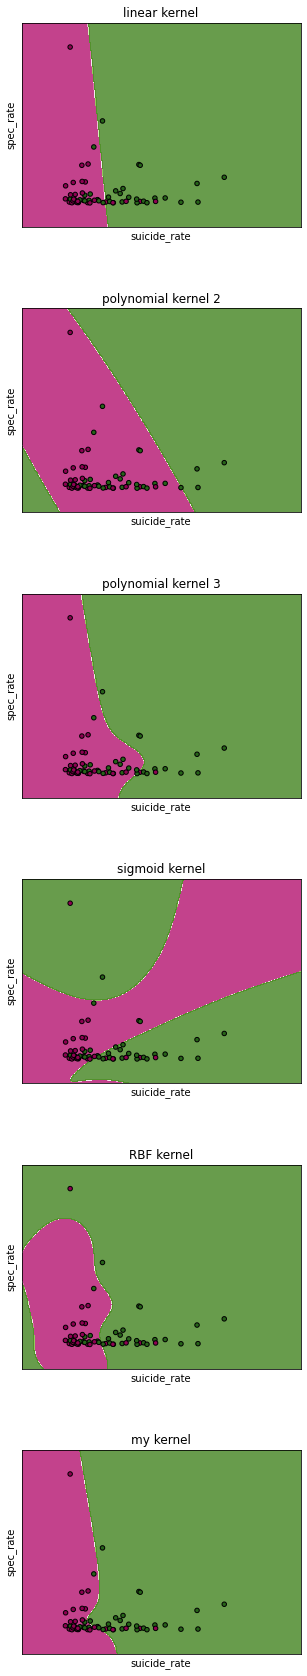

In [44]:
C = 1.0
models = (svm.SVC(kernel='linear', C=C),
          svm.SVC(kernel='poly', degree=2, gamma='auto', C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C),
          svm.SVC(kernel='sigmoid'),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel=my_poly))
    
titles = ('linear kernel',
          'polynomial kernel 2',
          'polynomial kernel 3',
          'sigmoid kernel',
          'RBF kernel',
          'my kernel')

fig, sub = plt.subplots(6, 1)
fig.set_size_inches(5, 30)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train[:, 0], X_train[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
        clf = clf.fit(X_train, y_train)
        ax.set_title(title)
        plot_contours(ax, clf, xx, yy, cmap=plt.cm.PiYG, alpha=0.8)
        print(clf.score(X_test, y_test))
        print(clf.predict(X_test))
        print(y_test)
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=plt.cm.PiYG, s=20, edgecolors='k')
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xlabel('suicide_rate')
        ax.set_ylabel('spec_rate')
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(title)

plt.show()


# K-MEANS

In [45]:
from sklearn.cluster import KMeans

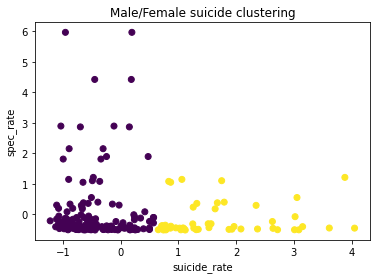

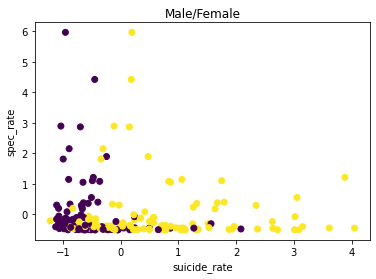

In [46]:
y_pred = KMeans(n_clusters=2, random_state=47).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.xlabel('suicide_rate')
plt.ylabel('spec_rate')
plt.title('Male/Female suicide clustering')
plt.show()

plt.scatter(X[:, 0], X[:, 1], c = data[:,0])
plt.xlabel('suicide_rate')
plt.ylabel('spec_rate')
plt.title('Male/Female')
plt.show()